<a href="https://colab.research.google.com/github/chhanish/walamrt_sales_forecast/blob/main/Dorecast_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("/content/Walmart Data Analysis and Forcasting.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')
dates=df.loc[(df['Date'].dt.month== 5 ) & (df['Date'].dt.year==2010),'Date']
sorted_dates=dates.drop_duplicates().sort_values()
print(sorted_dates)
print(dates.dt.strftime('%d-%m-%Y').tolist())

13   2010-05-07
14   2010-05-14
15   2010-05-21
16   2010-05-28
Name: Date, dtype: datetime64[ns]
['07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010', '07-0

In [5]:
 df['Date']=df['Date'].sort_values()

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
print(df[(df['Date'].dt.month== 5 ) & (df['Date'].dt.year==2010)]['Date'].nunique())

4


In [8]:

start_Date=df['Date'].min()
end_Date=df['Date'].max()

In [9]:
print(start_Date,end_Date)

2010-02-05 00:00:00 2012-10-26 00:00:00


In [10]:
start_Date_year = df['Date'].dt.year.min()

print(start_Date_year)

2010


In [11]:
print(df["Date"].dtype)

datetime64[ns]


In [12]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [13]:
print("Start_Year: ", df['Date'].dt.year.min(), "n\Start_Month",df['Date'].dt.month.min())
print("end_Year: ", df['Date'].dt.year.max(),"n\End_Month",df['Date'].dt.month.max())

Start_Year:  2010 n\Start_Month 1
end_Year:  2012 n\End_Month 12


In [14]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [15]:
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [16]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [17]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
day,0
month,0


In [18]:
Weekly_sales=df.groupby('Store')['Weekly_Sales'].sum().astype(int)

In [19]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [20]:
print("Total Weekly Sales For each store: ", Weekly_sales.sort_values())
sorted_by_stores_weekly_sales=Weekly_sales.sort_values()
print(sorted_by_stores_weekly_sales)

Total Weekly Sales For each store:  Store
33     37160221
44     43293087
5      45475688
36     53412214
38     55159626
3      57586735
30     62716885
37     74202740
16     74252425
29     77141554
9      77789218
42     79565752
7      81598275
15     89133683
43     90565435
25    101061179
21    108117878
45    112395341
17    127782138
8     129951181
35    131520672
40    137870309
34    138249763
26    143416393
12    144287230
22    147075648
18    155114734
32    166819246
41    181341934
28    189263680
11    193962786
24    194016021
23    198750617
31    199613905
19    206634862
39    207445542
1     222402808
6     223756130
27    253855916
10    271617713
2     275382440
13    286517703
14    288999911
4     299543953
20    301397792
Name: Weekly_Sales, dtype: int64
Store
33     37160221
44     43293087
5      45475688
36     53412214
38     55159626
3      57586735
30     62716885
37     74202740
16     74252425
29     77141554
9      77789218
42     79565752
7      

In [21]:
count_of_stores=df['Store'].nunique()
print("Count of Stores: ", count_of_stores)

Count of Stores:  45


In [22]:
average_sales=df.groupby('Store')['Weekly_Sales'].mean().reset_index(name="Average_Sales").astype(int)
avr_sales_sorted=average_sales.sort_values(by='Average_Sales',ascending=True)
print(average_sales)

    Store  Average_Sales
0       1        1555264
1       2        1925751
2       3         402704
3       4        2094712
4       5         318011
5       6        1564728
6       7         570617
7       8         908749
8       9         543980
9      10        1899424
10     11        1356383
11     12        1009001
12     13        2003620
13     14        2020978
14     15         623312
15     16         519247
16     17         893581
17     18        1084718
18     19        1444999
19     20        2107676
20     21         756069
21     22        1028501
22     23        1389864
23     24        1356755
24     25         706721
25     26        1002911
26     27        1775216
27     28        1323522
28     29         539451
29     30         438579
30     31        1395901
31     32        1166568
32     33         259861
33     34         966781
34     35         919724
35     36         373511
36     37         518900
37     38         385731
38     39        1450668


In [23]:
average_sales_newsorted=average_sales.sort_values(by='Average_Sales')
print(average_sales_newsorted)

    Store  Average_Sales
32     33         259861
43     44         302748
4       5         318011
35     36         373511
37     38         385731
2       3         402704
29     30         438579
36     37         518900
15     16         519247
28     29         539451
8       9         543980
41     42         556403
6       7         570617
14     15         623312
42     43         633324
24     25         706721
20     21         756069
44     45         785981
16     17         893581
7       8         908749
34     35         919724
39     40         964128
33     34         966781
25     26        1002911
11     12        1009001
21     22        1028501
17     18        1084718
31     32        1166568
40     41        1268125
27     28        1323522
10     11        1356383
23     24        1356755
22     23        1389864
30     31        1395901
18     19        1444999
38     39        1450668
0       1        1555264
5       6        1564728
26     27        1775216


In [24]:
print("Average Sales: ", average_sales)

Average Sales:      Store  Average_Sales
0       1        1555264
1       2        1925751
2       3         402704
3       4        2094712
4       5         318011
5       6        1564728
6       7         570617
7       8         908749
8       9         543980
9      10        1899424
10     11        1356383
11     12        1009001
12     13        2003620
13     14        2020978
14     15         623312
15     16         519247
16     17         893581
17     18        1084718
18     19        1444999
19     20        2107676
20     21         756069
21     22        1028501
22     23        1389864
23     24        1356755
24     25         706721
25     26        1002911
26     27        1775216
27     28        1323522
28     29         539451
29     30         438579
30     31        1395901
31     32        1166568
32     33         259861
33     34         966781
34     35         919724
35     36         373511
36     37         518900
37     38         385731
38     39

In [25]:
SD_stores=df['Weekly_Sales'].std()
print("SD_stores: ", SD_stores)

SD_stores:  564366.6220536974


# **Playing Around By creating New Dataset**

In [26]:
df_new=df.copy()

In [27]:
df_new=pd.DataFrame()

In [28]:
df_new['week'] = df['Date'].dt.isocalendar().week
df_new['month'] = df['Date'].dt.month
df_new['year'] = df['Date'].dt.year

In [29]:
df_new.head()

,week,month,year
0,5,2,2010
1,6,2,2010
2,7,2,2010
3,8,2,2010
4,9,3,2010


In [30]:
df_new=df_new.sort_values(by=['year','month','week'])

In [31]:
df_new.head()

,week,month,year
0,5,2,2010
143,5,2,2010
286,5,2,2010
429,5,2,2010
572,5,2,2010


In [32]:
df_new['store']=df['Store']

In [33]:
df_new.head()

,week,month,year,store
0,5,2,2010,1
143,5,2,2010,2
286,5,2,2010,3
429,5,2,2010,4
572,5,2,2010,5


In [34]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [35]:
Weekly_sales=df.groupby(['Store','year','month','day'])['Weekly_Sales'].sum().reset_index(name="Weekly_Sales")


In [36]:
df_new.duplicated('True')

KeyError: Index(['True'], dtype='object')

In [37]:

# Change the column name 'Store' to 'store' in the Weekly_sales dataframe
Weekly_sales.rename(columns={'Store': 'store'}, inplace=True)


df_new=pd.merge(df_new,Weekly_sales,on=['store','year','month'],how='left')

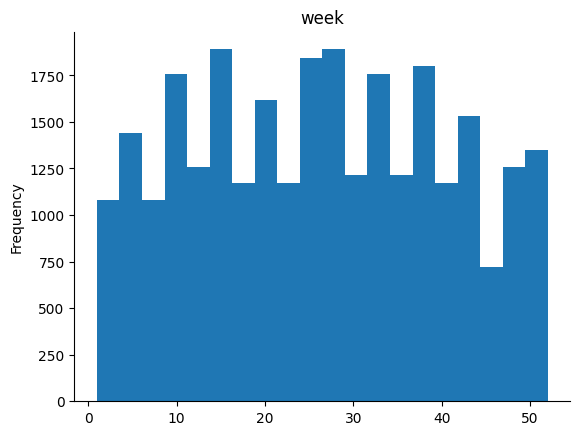

In [38]:
# @title week

from matplotlib import pyplot as plt
df_new['week'].plot(kind='hist', bins=20, title='week')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
Average_sales_pf_all_stores=df['Weekly_Sales'].mean()
print("Average_sales_pf_all_stores: ", Average_sales_pf_all_stores)

Average_sales_pf_all_stores:  1046964.8775617715


In [40]:
SD_stores=df['Weekly_Sales'].std()
print("SD_stores: ", SD_stores)

SD_stores:  564366.6220536974


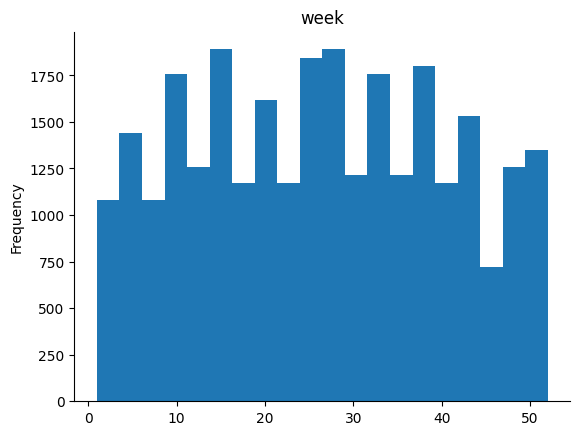

In [41]:
from matplotlib import pyplot as plt
df_new['week'].plot(kind='hist', bins=20, title='week')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Back to mainpart**

In [42]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


# **Which  of weeks of Year usually record highest sales**

In [43]:
#add week coulmn
df['week']=df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,9


In [44]:
df['week'].nunique()

52

In [45]:
weekly_sales_by_year_week = df.groupby(['year', 'week'])['Weekly_Sales'].sum().reset_index()
weekly_sales_by_year_week=weekly_sales_by_year_week.sort_values(by=['Weekly_Sales'],ascending=False)
weekly_sales_by_year_week.head(10)

,year,week,Weekly_Sales
46,2010,51,80931415.60
98,2011,51,76998241.31
94,2011,47,66593605.26
42,2010,47,65821003.24
45,2010,50,61820799.85
97,2011,50,60085695.94
44,2010,49,55666770.39
96,2011,49,55561147.70
113,2012,14,53502315.87
126,2012,27,51253021.88


In [46]:
# Group by year and week and find the sum of Weekly_Sales for each group
weekly_sales_by_year_week = df.groupby(['year', 'week'])['Weekly_Sales'].sum().reset_index()

# Find the row with the maximum Weekly_Sales
week_with_highest_sales = weekly_sales_by_year_week.loc[weekly_sales_by_year_week['Weekly_Sales'].idxmax()]

print("Week with the highest sales:")
print(week_with_highest_sales)

Week with the highest sales:
year                2010.0
week                  51.0
Weekly_Sales    80931415.6
Name: 46, dtype: Float64


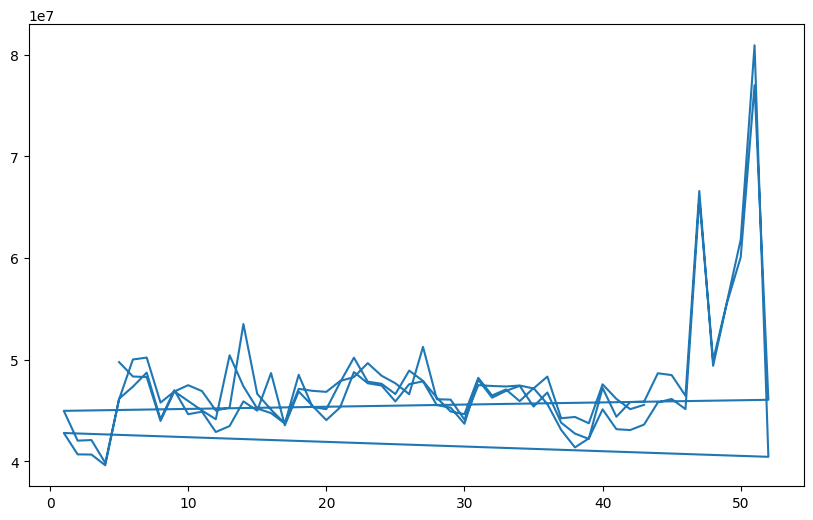

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_by_year_week['week'], weekly_sales_by_year_week['Weekly_Sales'])

<Axes: xlabel='week', ylabel='Weekly_Sales'>

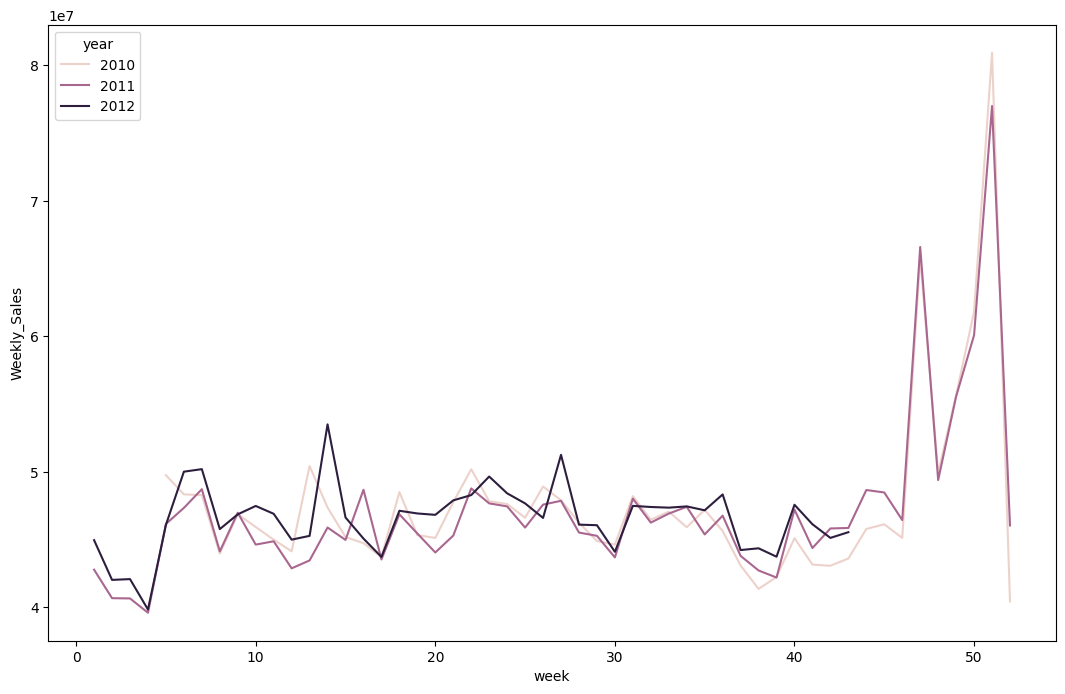

In [48]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,8))
sns.lineplot(data=weekly_sales_by_year_week, x='week', y='Weekly_Sales',hue='year')

In [49]:
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,7


In [50]:
Holiday_weeks = df['Holiday_Flag'].value_counts()
Holidays_weeks=df.groupby(['year','week'])['Holiday_Flag'].sum().sort_values(ascending=False)
print(Holidays_weeks.tolist())
print(Holiday_weeks.count())

[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2


In [51]:
holiday_weeks_df = df[(df['Holiday_Flag'] == 1) & (df['year'] == 2011)]
holiday_weeks_df.sort_values(by=['week']).head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,11,2,2011,6
196,2,2011-02-11,2168041.61,1,33.19,3.022,212.592862,8.028,11,2,2011,6
482,4,2011-02-11,2187847.29,1,33.29,3.033,127.859129,6.510,11,2,2011,6
339,3,2011-02-11,430526.21,1,43.57,3.022,216.266091,7.551,11,2,2011,6
911,7,2011-02-11,559903.13,1,10.24,3.037,191.857288,8.818,11,2,2011,6


In [52]:
holiday_weeks_df['week'].count()
count_holidays=holiday_weeks_df['week'].sort_values().nunique()
holiday_weeks_list=holiday_weeks_df['week'].unique().tolist()
count_holidays
holiday_weeks_list

[6, 36, 47, 52]

In [53]:
# Filter the DataFrame for rows where 'Holiday_Flag' is 1
holiday_weeks_df = df[(df['Holiday_Flag'] == 1) & (df['year'] == 2011)]

# Select the 'year' and 'week' columns from the filtered DataFrame
holiday_weeks_info = holiday_weeks_df[['week']]

# Print the resulting DataFrame
print(holiday_weeks_info)

      week
53       6
83      36
94      47
99      52
196      6
...    ...
6248    52
6345     6
6375    36
6386    47
6391    52

[180 rows x 1 columns]


<Axes: xlabel='week', ylabel='Holiday_Flag'>

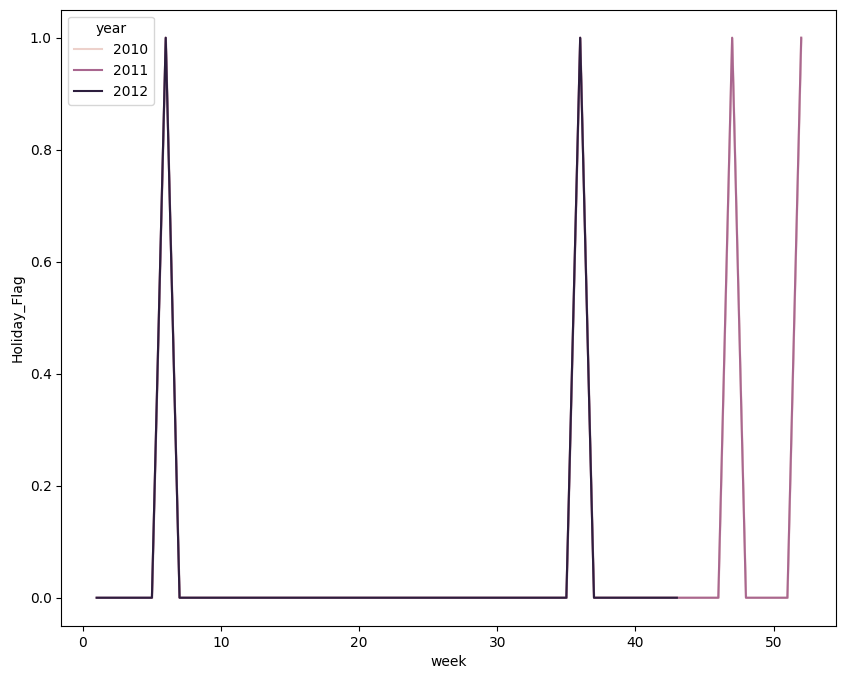

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=df, x='week', y='Holiday_Flag',hue='year')


<Axes: xlabel='week', ylabel='Temperature'>

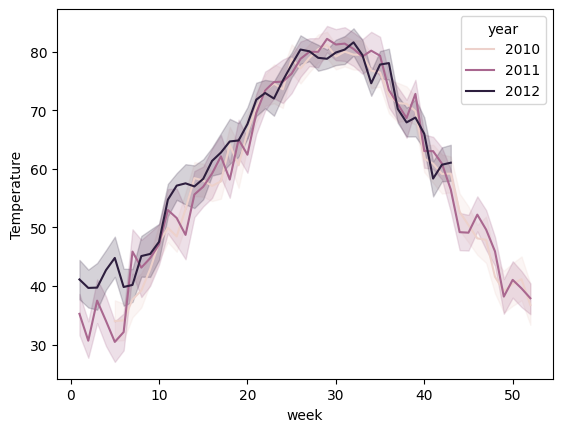

In [55]:
sns.lineplot(data=df, x='week', y='Temperature',hue='year')

In [56]:
correlation=df['Weekly_Sales'].corr(df['Temperature'])
correlation_percentage=correlation*100
print(f"Correlation between 'Weekly_Sales' and 'Temperature': {correlation_percentage}")

Correlation between 'Weekly_Sales' and 'Temperature': -6.381001317946956


In [57]:
weekly_summary = df.groupby(['year', 'week']).agg(
    Weekly_Sales=('Weekly_Sales', 'sum'),
    Fuel_Price=('Fuel_Price', 'mean'),
    Unemployment=('Unemployment', 'mean'),
    Holiday_Count=('Holiday_Flag', 'sum') # Sum of Holiday_Flag for the week
).reset_index()

# Calculate the correlation matrix for the relevant columns in the weekly summary
correlation_matrix = weekly_summary[['Weekly_Sales', 'Fuel_Price', 'Holiday_Count', 'Unemployment']].corr()
correlation_matrix_percentage=correlation_matrix*100
# Print the correlation matrix
print("Correlation matrix between Weekly Sales, Fuel Price, Holiday Count, and Unemployment:")
print(correlation_matrix_percentage)

# To get the specific correlations you asked for:
correlation_sales_fuel = correlation_matrix_percentage.loc['Weekly_Sales', 'Fuel_Price']
correlation_sales_holidays = correlation_matrix_percentage.loc['Weekly_Sales', 'Holiday_Count']
correlation_sales_unemployment = correlation_matrix_percentage.loc['Weekly_Sales', 'Unemployment']


Correlation matrix between Weekly Sales, Fuel Price, Holiday Count, and Unemployment:
               Weekly_Sales  Fuel_Price  Holiday_Count  Unemployment
Weekly_Sales     100.000000   -5.672247      17.268293      0.352356
Fuel_Price        -5.672247  100.000000      -8.403852    -74.720463
Holiday_Count     17.268293   -8.403852     100.000000      4.263874
Unemployment       0.352356  -74.720463       4.263874    100.000000


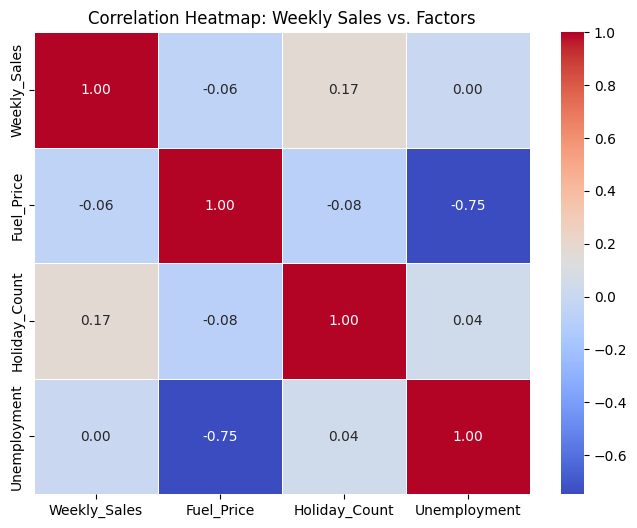

In [58]:
correlation_matrix = weekly_summary[['Weekly_Sales', 'Fuel_Price', 'Holiday_Count', 'Unemployment']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6)) # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap: Weekly Sales vs. Factors')

# Display the plot
plt.show()

In [59]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,9


In [60]:
df=df.drop('Unemployment',axis=1)

In [61]:
weekly_sales = df.groupby(['year', 'week'])['Weekly_Sales'].sum().reset_index()
weekly_sales=weekly_sales.sort_values(by=['year','week']).reset_index(drop=True)
weekly_sales['pct_chg_10wk']=weekly_sales['Weekly_Sales'].pct_change(periods=10)*100

In [62]:
weekly_sales.head()

,year,week,Weekly_Sales,pct_chg_10wk
0,2010,5,49750740.50,NaN
1,2010,6,48336677.63,NaN
2,2010,7,48276993.78,NaN
3,2010,8,43968571.13,NaN
4,2010,9,46871470.30,NaN


<Axes: xlabel='None', ylabel='pct_chg_10wk'>

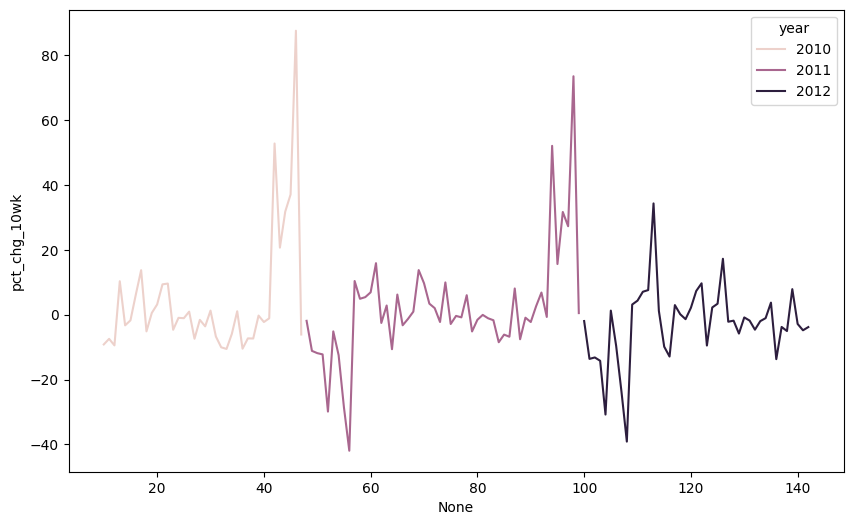

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_sales, x=weekly_sales.index,y='pct_chg_10wk',hue='year')

In [64]:
weekly_sales['Growth_pct']=weekly_sales['Weekly_Sales'].pct_change()*100


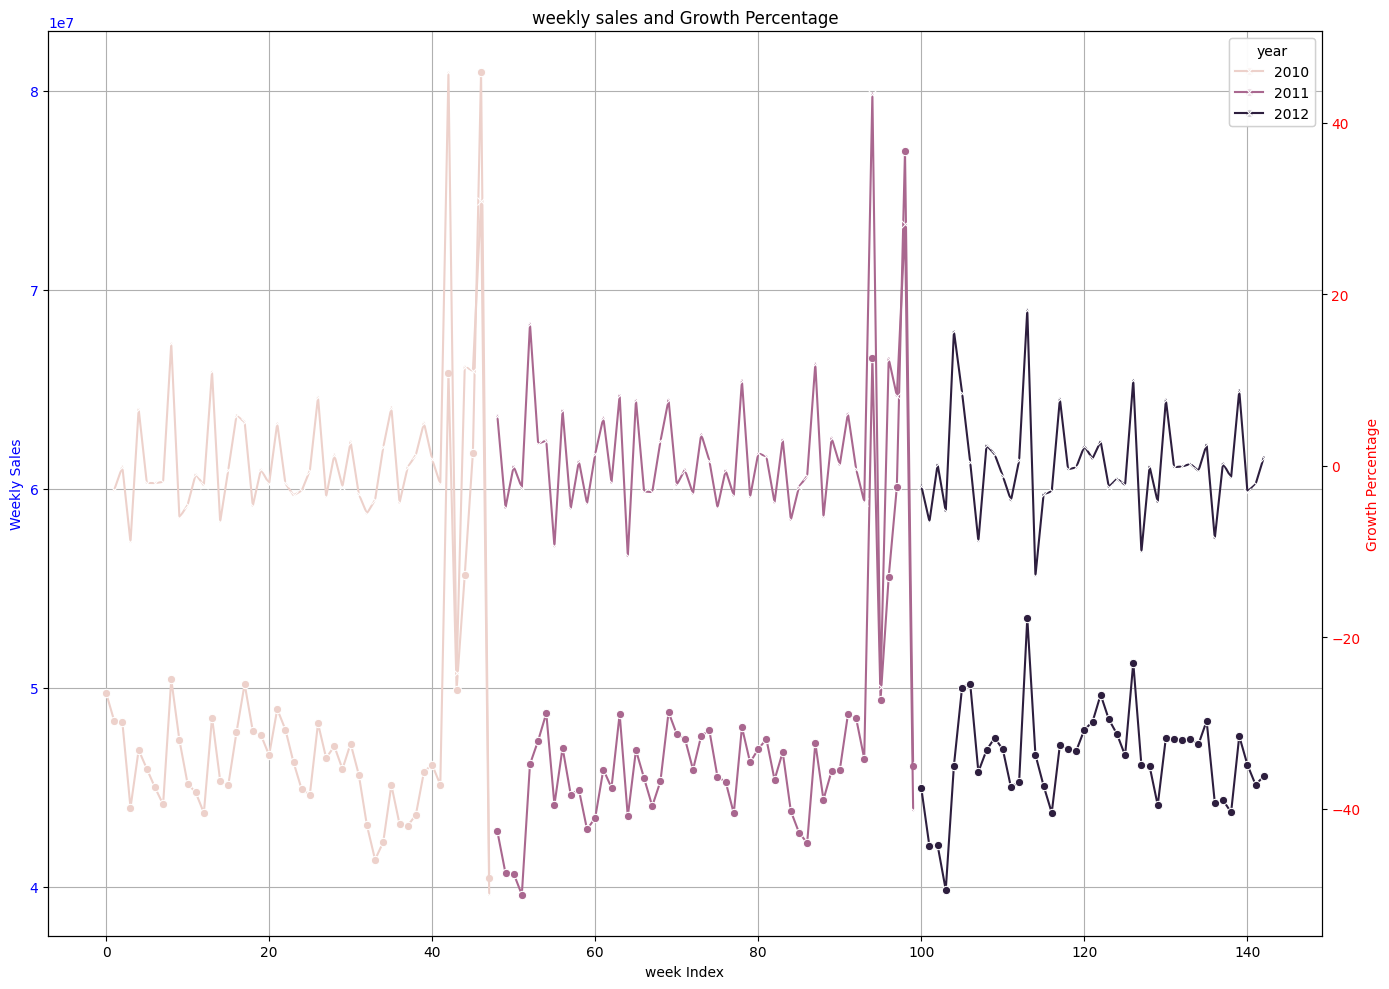

In [65]:
plt.figure(figsize=(14, 10))
#Main axis for weekly sales
ax1=sns.lineplot(data=weekly_sales, x=weekly_sales.index,y='Weekly_Sales',hue='year',color='blue',marker='o')
ax1.set_ylabel('Weekly Sales',color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
#Twin axis Growth Percentage
ax2=ax1.twinx()
sns.lineplot(data=weekly_sales, x=weekly_sales.index,y='Growth_pct',hue='year',ax=ax2,color='red',marker='x')
ax2.set_ylabel('Growth Percentage',color='red')
ax2.tick_params(axis='y', labelcolor='red')
#Title and Layout
plt.title('weekly sales and Growth Percentage')
ax1.set_xlabel('week Index')
ax1.grid(True)
plt.tight_layout()
plt.show()

In [66]:
weekly_sales.head()

,year,week,Weekly_Sales,pct_chg_10wk,Growth_pct
0,2010,5,49750740.50,NaN,NaN
1,2010,6,48336677.63,NaN,-2.842295
2,2010,7,48276993.78,NaN,-0.123475
3,2010,8,43968571.13,NaN,-8.924381
4,2010,9,46871470.30,NaN,6.602214


In [67]:
weekly_sales['Week_Year'] = weekly_sales['year'].astype(str) + '-W' + weekly_sales['week'].astype(str).str.zfill(2)
weekly_sales.head()

,year,week,Weekly_Sales,pct_chg_10wk,Growth_pct,Week_Year
0,2010,5,49750740.50,NaN,NaN,2010-W05
1,2010,6,48336677.63,NaN,-2.842295,2010-W06
2,2010,7,48276993.78,NaN,-0.123475,2010-W07
3,2010,8,43968571.13,NaN,-8.924381,2010-W08
4,2010,9,46871470.30,NaN,6.602214,2010-W09


<ipython-input-68-57634f187c84>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(weekly_sales['Week_Year'], rotation=45)


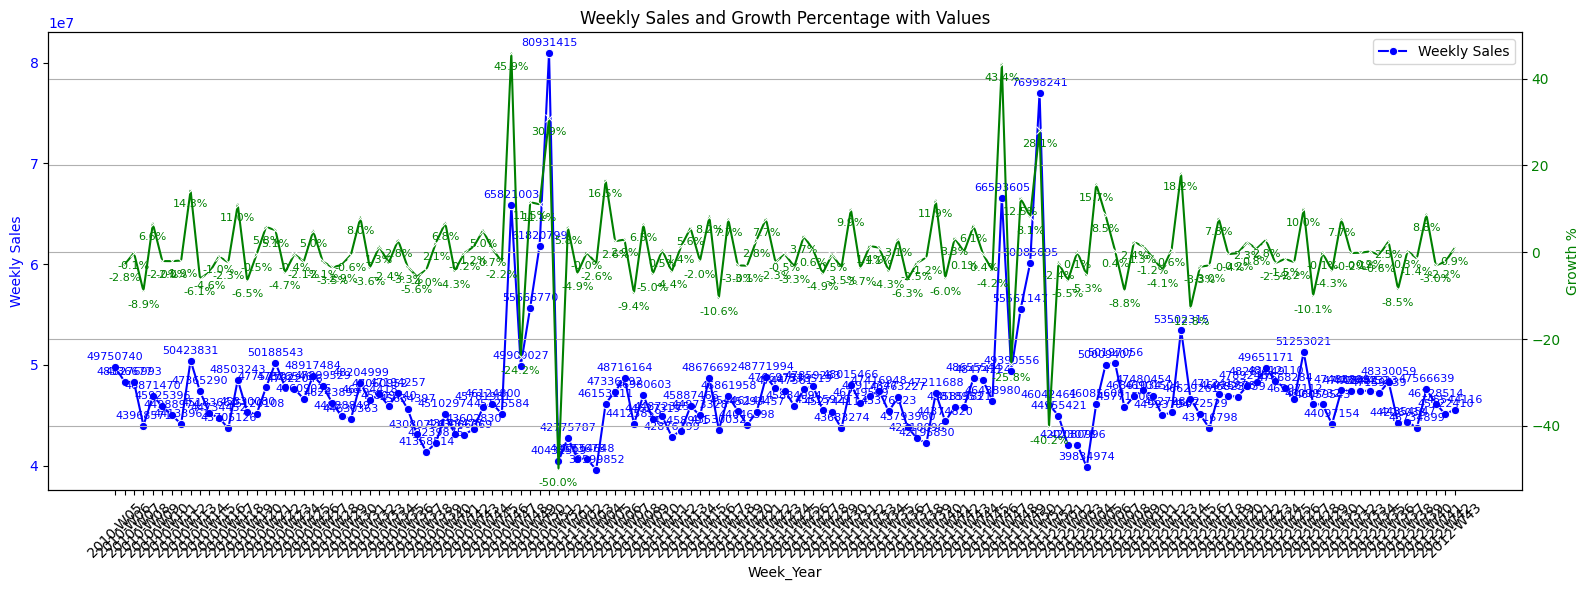

In [68]:

# Plot
fig, ax1 = plt.subplots(figsize=(16, 6))
# Line plot for Weekly Sales
sns.lineplot(data=weekly_sales, x='Week_Year', y='Weekly_Sales', ax=ax1, color='blue', marker='o', label='Weekly Sales')
ax1.set_ylabel('Weekly Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(weekly_sales['Week_Year'], rotation=45)

# Annotate Weekly Sales
for i, row in weekly_sales.iterrows():
   ax1.annotate(f"{int(row['Weekly_Sales'])}", xy=(i, row['Weekly_Sales']),
                textcoords="offset points", xytext=(0,5), ha='center', color='blue', fontsize=8)

# Twin axis for Growth %
ax2 = ax1.twinx()
# Correct the column name from 'Growth_Pct' to 'Growth_pct'
sns.lineplot(data=weekly_sales, x='Week_Year', y='Growth_pct', ax=ax2, color='green', marker='x')
ax2.set_ylabel('Growth %', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Annotate Growth %
for i, row in weekly_sales.iterrows():
   # Correct the column name from 'Growth_Pct' to 'Growth_pct'
   if pd.notnull(row['Growth_pct']):
       ax2.annotate(f"{row['Growth_pct']:.1f}%", # Format the percentage to one decimal place
                    (row['Week_Year'], row['Growth_pct']), # Use Week_Year for x-coordinate annotation
                    textcoords="offset points", # How to position the text
                    xytext=(0,-12), # Offset from the data point (x, y) in points
                    ha='center', # Horizontal alignment
                    color='green', # Color of the text
                    fontsize=8) # Font size


# Final touches
plt.title('Weekly Sales and Growth Percentage with Values')
plt.tight_layout()
plt.grid(True)
plt.show()

In [69]:
weekly_sales_by_year_week.head()

,year,week,Weekly_Sales
0,2010,5,49750740.50
1,2010,6,48336677.63
2,2010,7,48276993.78
3,2010,8,43968571.13
4,2010,9,46871470.30


<Axes: xlabel='week', ylabel='Weekly_Sales'>

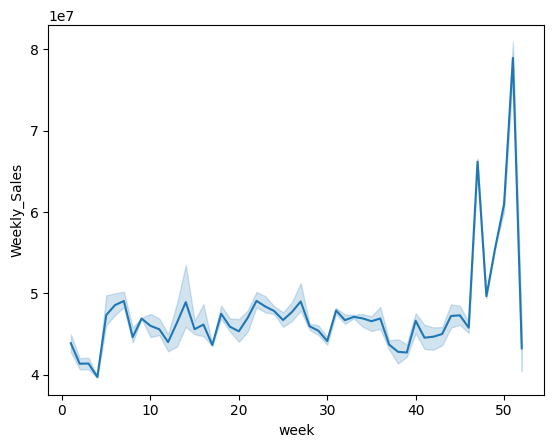

In [70]:
import seaborn as sns
sns.lineplot(data=weekly_sales_by_year_week, x='week', y='Weekly_Sales')

In [71]:
weekly_sales['Growth_pct']=weekly_sales['Weekly_Sales'].pct_change(periods=10)*100# Changing growth percent to be same as pct_chg_10wk
weekly_sales.head()

,year,week,Weekly_Sales,pct_chg_10wk,Growth_pct,Week_Year
0,2010,5,49750740.50,NaN,NaN,2010-W05
1,2010,6,48336677.63,NaN,NaN,2010-W06
2,2010,7,48276993.78,NaN,NaN,2010-W07
3,2010,8,43968571.13,NaN,NaN,2010-W08
4,2010,9,46871470.30,NaN,NaN,2010-W09


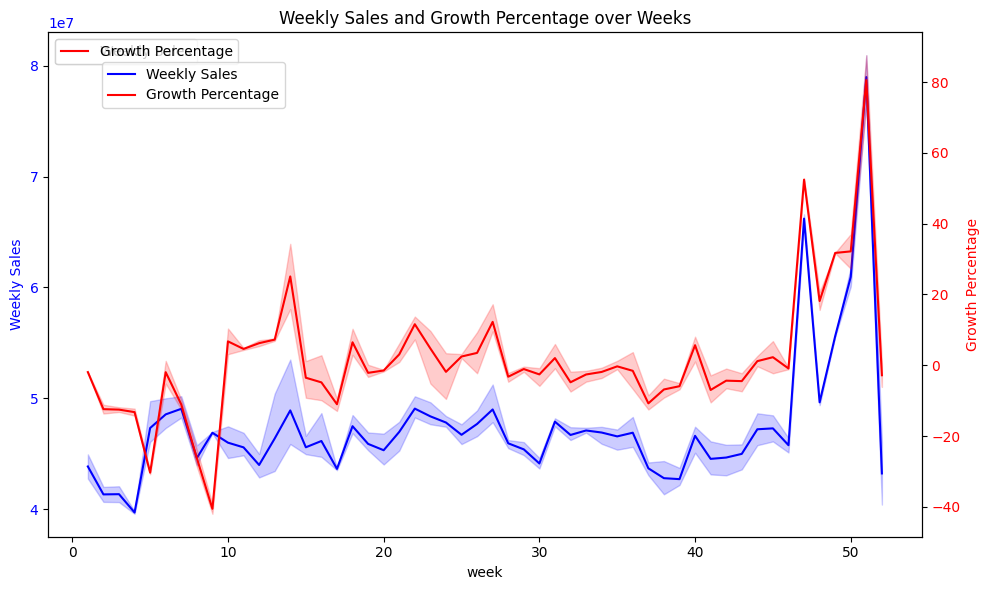

In [72]:


# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Weekly Sales on the primary axis
sns.lineplot(data=weekly_sales, x='week', y='Weekly_Sales', ax=ax1, label='Weekly Sales', color='blue')
ax1.set_ylabel('Weekly Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis
ax2 = ax1.twinx()

# Plot Growth Percentage on the twin axis
sns.lineplot(data=weekly_sales, x='week', y='Growth_pct', ax=ax2, label='Growth Percentage', color='red')
ax2.set_ylabel('Growth Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
plt.title('Weekly Sales and Growth Percentage over Weeks')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

In [73]:
print(len(weekly_sales))

143


In [74]:
# Calculate the percentage change between 10-week intervals
# We'll iterate through the DataFrame in steps of 10
weekly_sales['Growth_pct_interval'] = None # Initialize the new column

for i in range(0, len(weekly_sales), 10):
    # Get the index of the start and end of the interval
    start_index = i
    end_index = i + 10 -1  # -1 because we are looking at the interval up to 10 weeks later

    # Ensure the end index is within the bounds of the DataFrame
    if end_index < len(weekly_sales):
        # Get the sales values at the start and end of the interval
        start_sales = weekly_sales.loc[start_index, 'Weekly_Sales']
        end_sales = weekly_sales.loc[end_index, 'Weekly_Sales']

        # Calculate the percentage change
        if start_sales != 0: # Avoid division by zero
            growth_pct = ((end_sales - start_sales) / start_sales) * 100
            # Assign the calculated growth percentage to the end of the interval
            weekly_sales.loc[end_index, 'Growth_pct_interval'] = growth_pct
        else:
            weekly_sales.loc[end_index, 'Growth_pct_interval'] = 0 # Or handle as appropriate for zero starting sales

# Now 'Growth_pct_interval' column contains the percentage change for each 10-week interval

weekly_sales['Growth_pct'] = weekly_sales['Growth_pct_interval']
weekly_sales = weekly_sales.drop(columns=['Growth_pct_interval'])

# Print the DataFrame to verify the new column
print(weekly_sales[['Weekly_Sales', 'Growth_pct']].head(20))

    Weekly_Sales Growth_pct
0    49750740.50       None
1    48336677.63       None
2    48276993.78       None
3    43968571.13       None
4    46871470.30       None
5    45925396.51       None
6    44988974.64       None
7    44133961.05       None
8    50423831.26       None
9    47365290.44  -4.794803
10   45183667.08       None
11   44734452.56       None
12   43705126.71       None
13   48503243.52       None
14   45330080.20       None
15   45120108.06       None
16   47757502.56       None
17   50188543.12       None
18   47826546.72       None
19   47622046.23   5.396594


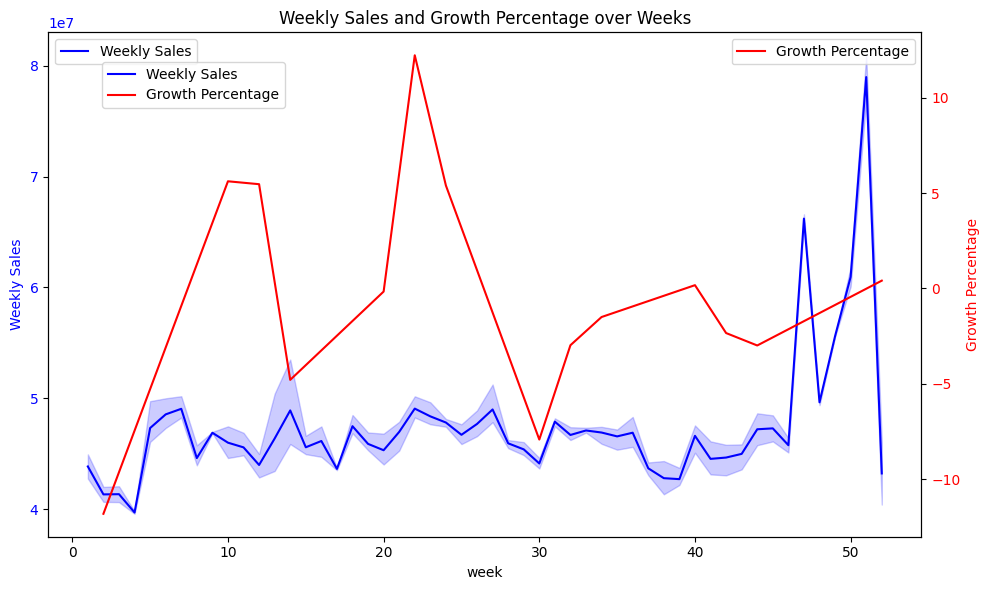

In [75]:

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Weekly Sales on the primary axis
sns.lineplot(data=weekly_sales, x='week', y='Weekly_Sales', ax=ax1, label='Weekly Sales', color='blue')
ax1.set_ylabel('Weekly Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis
ax2 = ax1.twinx()

# Plot Growth Percentage on the twin axis
sns.lineplot(data=weekly_sales, x='week', y='Growth_pct', ax=ax2, label='Growth Percentage', color='red')
ax2.set_ylabel('Growth Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
plt.title('Weekly Sales and Growth Percentage over Weeks')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

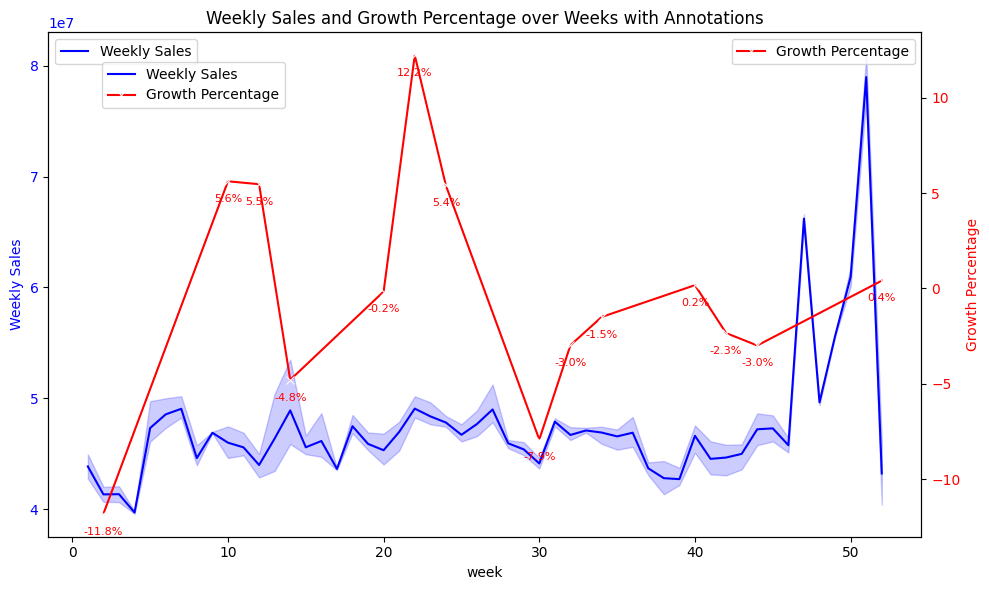

In [76]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Weekly Sales on the primary axis
sns.lineplot(data=weekly_sales, x='week', y='Weekly_Sales', ax=ax1, label='Weekly Sales', color='blue')
ax1.set_ylabel('Weekly Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis
ax2 = ax1.twinx()

# Plot Growth Percentage on the twin axis
sns.lineplot(data=weekly_sales, x='week', y='Growth_pct', ax=ax2, label='Growth Percentage', color='red', marker='x') # Added marker for visibility
ax2.set_ylabel('Growth Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Annotate Growth Percentage values
# Iterate through the DataFrame to add annotations
for i, row in weekly_sales.iterrows():
    # Check if the Growth_pct value is not null before annotating
    if pd.notnull(row['Growth_pct']):
        ax2.annotate(f"{row['Growth_pct']:.1f}%", # Format the percentage to one decimal place
                     (row['week'], row['Growth_pct']), # Position of the annotation (x, y)
                     textcoords="offset points", # How to position the text
                     xytext=(0,-15), # Offset from the data point (x, y) in points
                     ha='center', # Horizontal alignment
                     color='red', # Color of the text
                     fontsize=8) # Font size

# Add title and legends
plt.title('Weekly Sales and Growth Percentage over Weeks with Annotations')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

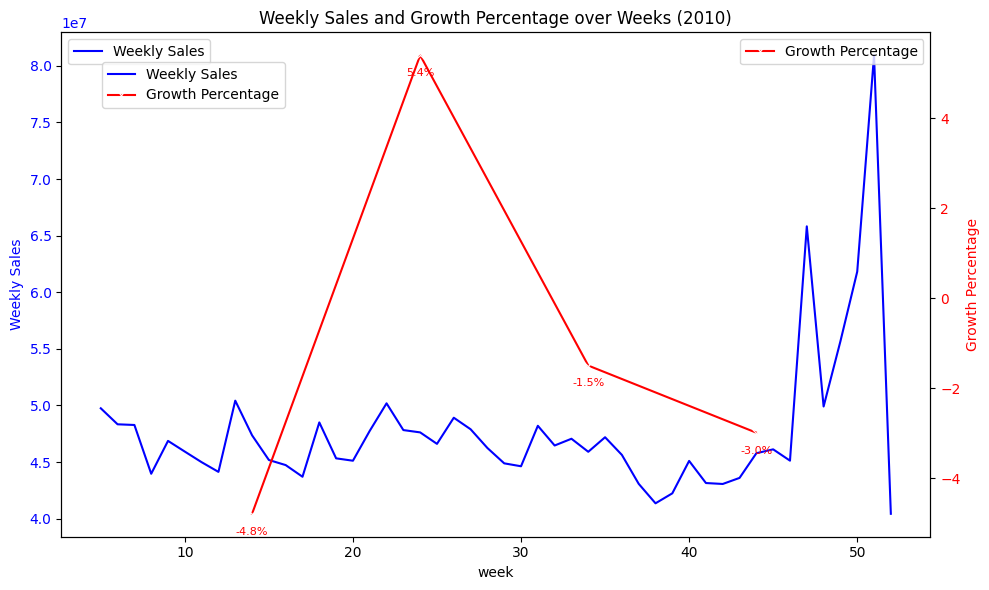

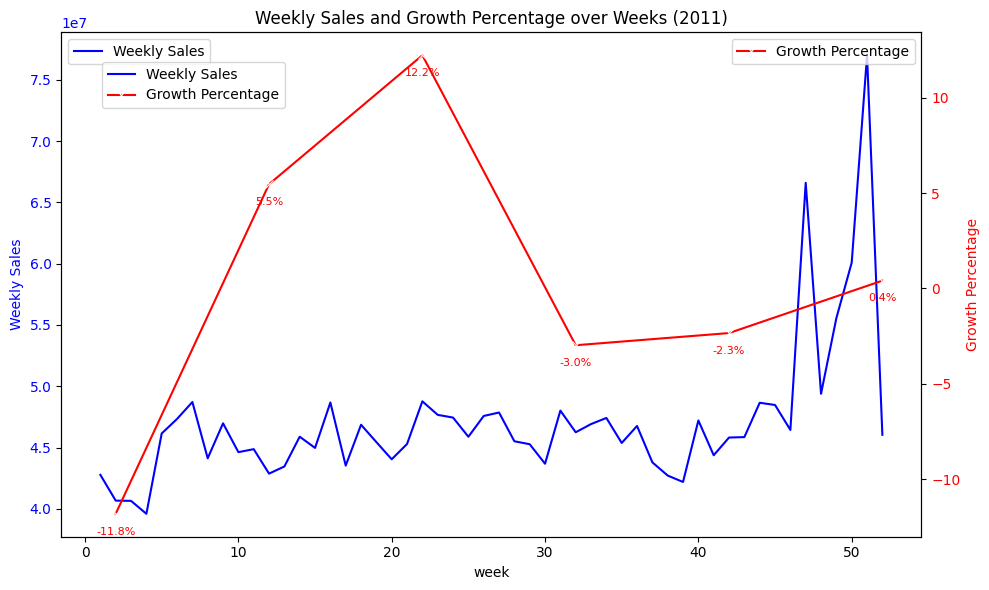

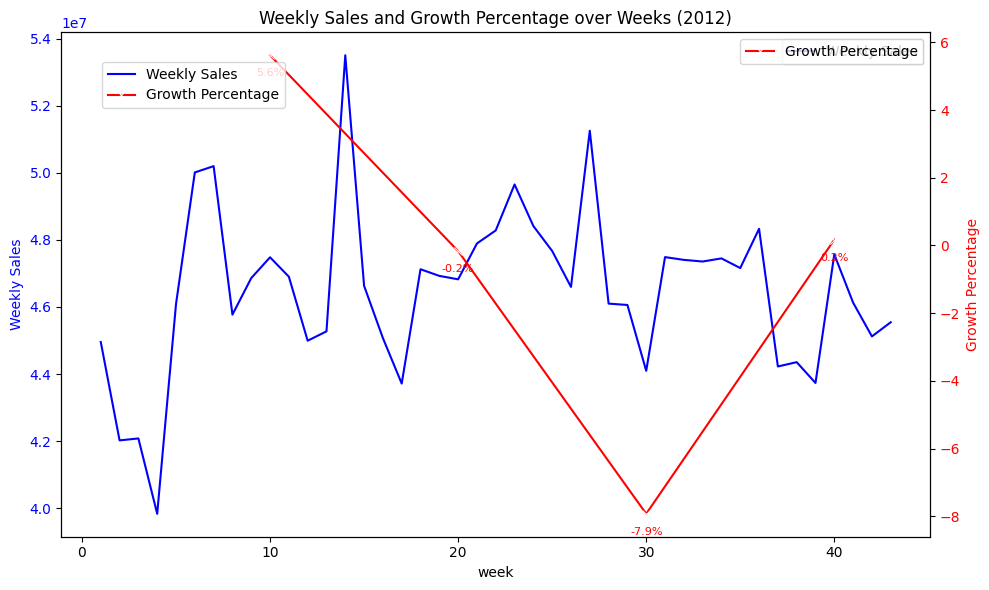

In [77]:
# Get the unique years in the DataFrame
unique_years = weekly_sales['year'].unique()

# Iterate through each year and create a separate plot
for year in unique_years:
    # Filter the DataFrame for the current year
    weekly_sales_year = weekly_sales[weekly_sales['year'] == year].copy()

    # Create a figure and a set of subplots for the current year
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Weekly Sales on the primary axis
    sns.lineplot(data=weekly_sales_year, x='week', y='Weekly_Sales', ax=ax1, label='Weekly Sales', color='blue')
    ax1.set_ylabel('Weekly Sales', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a twin axis
    ax2 = ax1.twinx()

    # Plot Growth Percentage on the twin axis
    sns.lineplot(data=weekly_sales_year, x='week', y='Growth_pct', ax=ax2, label='Growth Percentage', color='red', marker='x') # Added marker for visibility
    ax2.set_ylabel('Growth Percentage', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Annotate Growth Percentage values
    # Iterate through the DataFrame to add annotations
    for i, row in weekly_sales_year.iterrows():
        # Check if the Growth_pct value is not null before annotating
        if pd.notnull(row['Growth_pct']):
            ax2.annotate(f"{row['Growth_pct']:.1f}%", # Format the percentage to one decimal place
                         (row['week'], row['Growth_pct']), # Position of the annotation (x, y)
                         textcoords="offset points", # How to position the text
                         xytext=(0,-15), # Offset from the data point (x, y) in points
                         ha='center', # Horizontal alignment
                         color='red', # Color of the text
                         fontsize=8) # Font size

    # Add title and legends
    plt.title(f'Weekly Sales and Growth Percentage over Weeks ({year})') # Add year to the title
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

    plt.tight_layout()
    plt.show()

# **There is a huge surge and then drop expected at 10th week to 30th week**

# Store number with the MOST/LEAST weekly sales.

In [78]:
Store_max_weekly_Sales = df.groupby('Store')['Weekly_Sales'].sum().idxmax()
Store_min_weekly_Sales = df.groupby('Store')['Weekly_Sales'].sum().idxmin()
print("Store with the most weekly sales: ", Store_max_weekly_Sales)
print("Store with the least weekly sales: ", Store_min_weekly_Sales)

Store with the most weekly sales:  20
Store with the least weekly sales:  33


In [79]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,day,month,year,week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,5,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,12,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,19,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,26,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,5,3,2010,9


In [80]:
average_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index(name="Average_Sales")
average_sales.head()

,Store,Average_Sales
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05


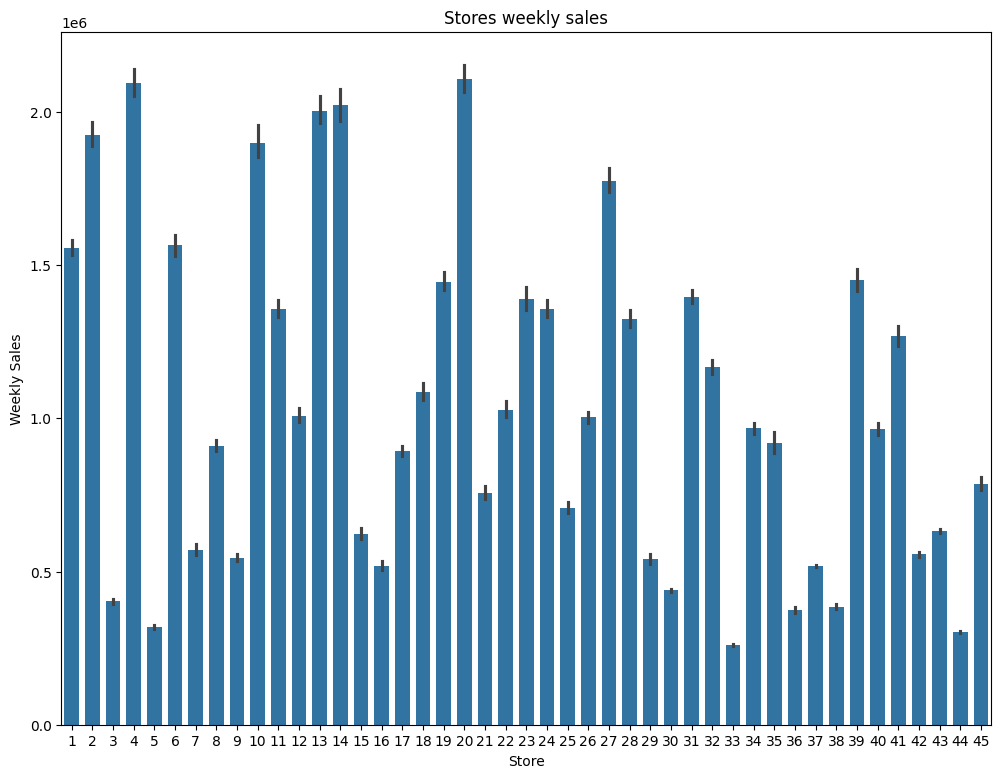

In [81]:
#weekly saes
plt.figure(figsize=(12,9))
sns.barplot(data=df,x='Store',y='Weekly_Sales',hue=None,width=0.7)



for i, row in df.iterrows():
   ax1.annotate(f"{int(row['Weekly_Sales'])}", xy=(i, row['Weekly_Sales']),
                textcoords="offset points", xytext=(0,5), ha='center', color='blue', fontsize=8)



plt.title("Stores weekly sales")
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

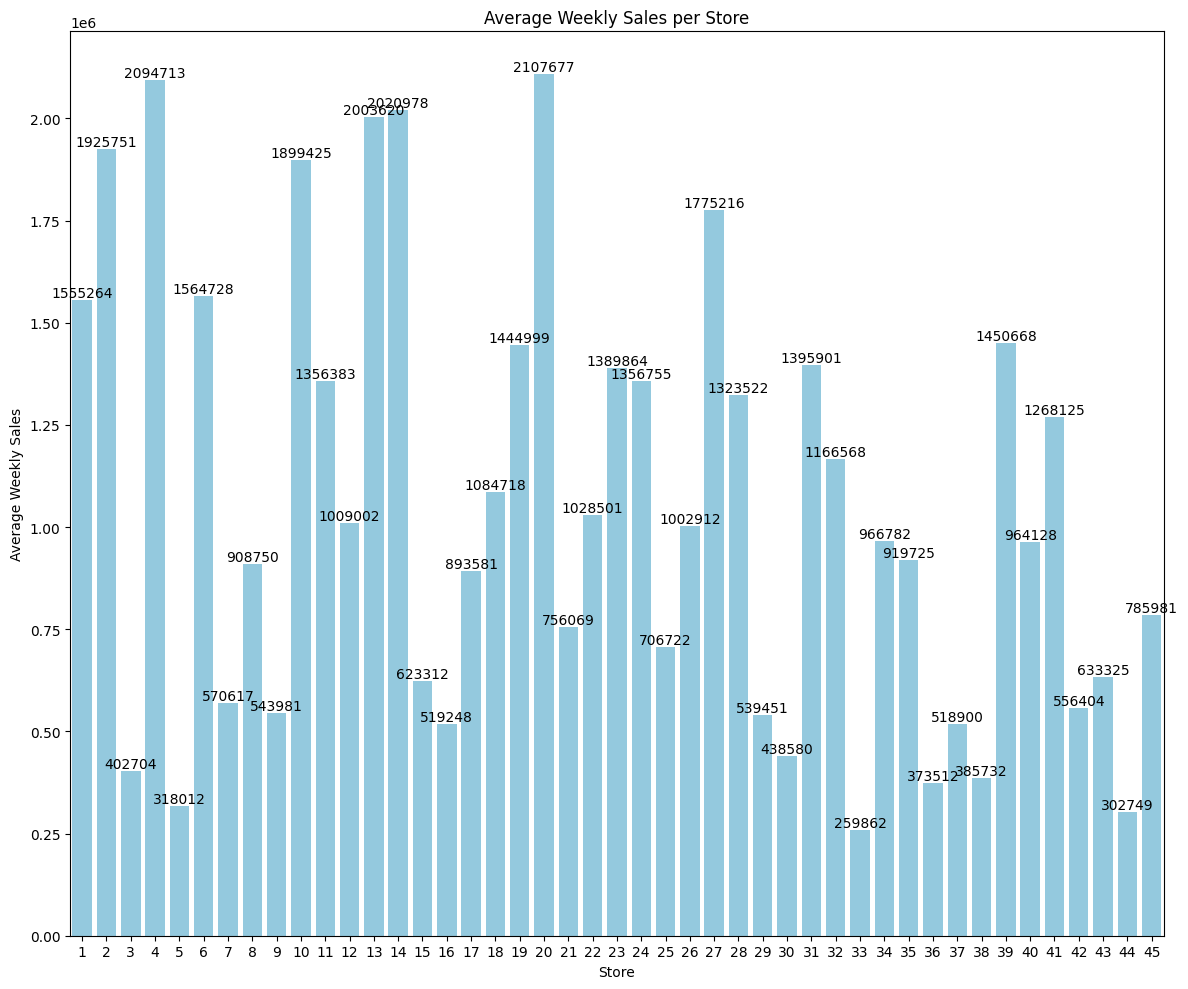

In [82]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=average_sales, x='Store', y='Average_Sales', color='skyblue')
plt.title("Average Weekly Sales per Store")
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge') # Use bar_label for easy annotation

# Alternatively, you can iterate through the data points in average_sales:
# for index, row in average_sales.iterrows():
#     ax.annotate(f"{int(row['Average_Sales'])}", # Annotation text (integer average sales)
#                 (row['Store'], row['Average_Sales']), # Position (x, y)
#                 textcoords="offset points", # How to position the text
#                 xytext=(0, 5), # Offset (x, y) in points
#                 ha='center', # Horizontal alignment
#                 va='bottom', # Vertical alignment
#                 color='black', # Color of the text
#                 fontsize=8) # Font size

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

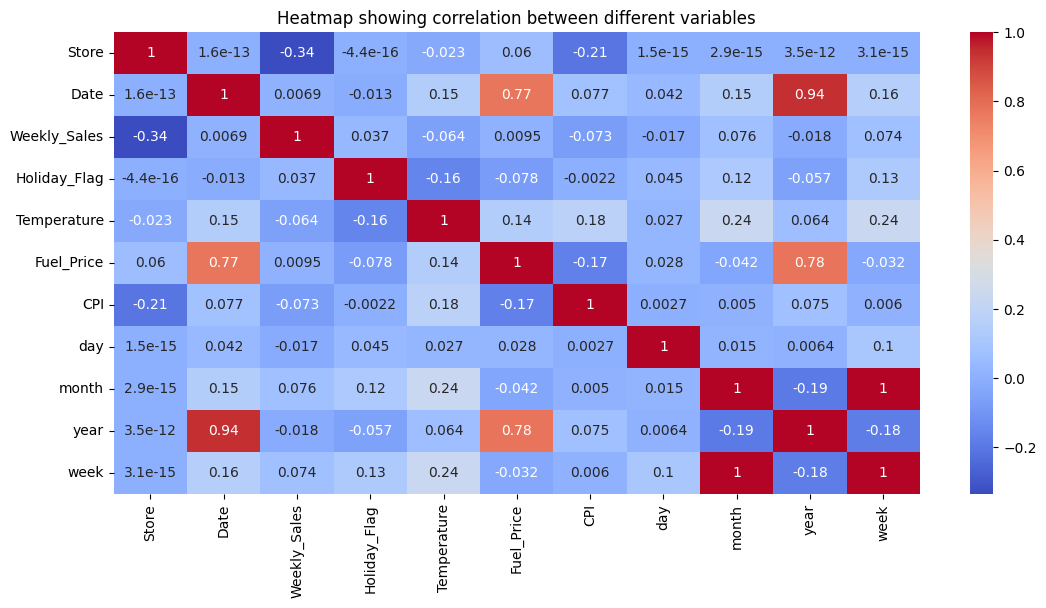

In [83]:
plt.figure(figsize=(13,6))

# Plot the heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# add title to plot
plt.title('Heatmap showing correlation between different variables')

# show plot
plt.show()

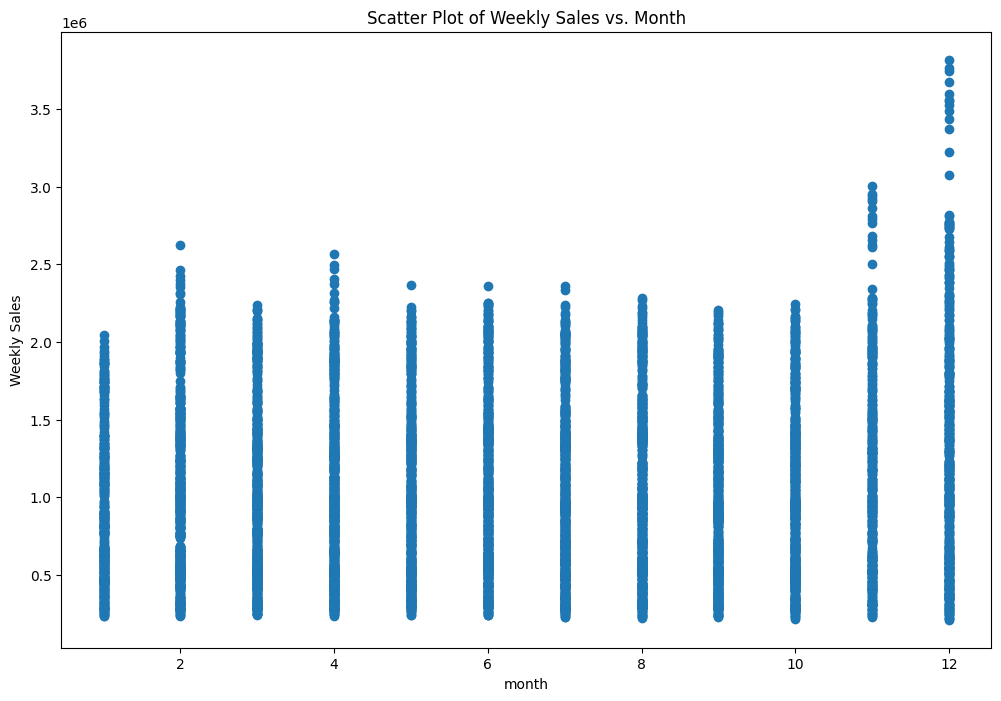

In [84]:
plt.figure(figsize=(12,8))

# Scatter Plot of Weekly Sales VS Month columns
plt.scatter(df['month'], df['Weekly_Sales'])
plt.xlabel('month')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Weekly Sales vs. Month')

# Show plot
plt.show()



# Q4 (October - December) Weekly Sales usually experiences a surge.

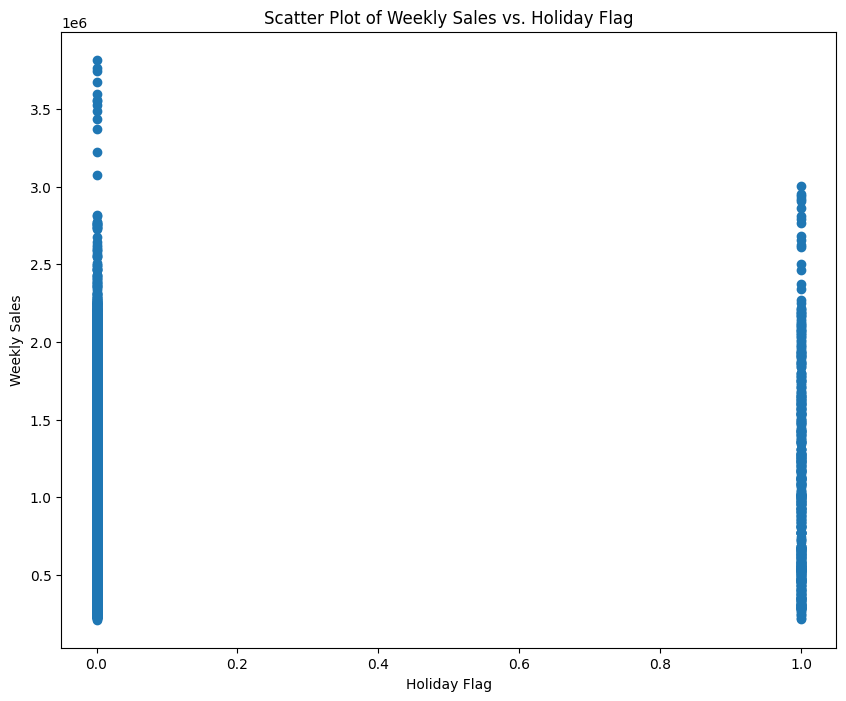

In [85]:
plt.figure(figsize=(10,8))

# Scatter Plot of Weekly Sales VS Holiday Flag columns
plt.scatter(df['Holiday_Flag'], df['Weekly_Sales'])
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Weekly Sales vs. Holiday Flag')

# Show Plot
plt.show()

# **Walmart experiences more Weekly Sales during Non-Holidays(0) than during Holidays(1).**

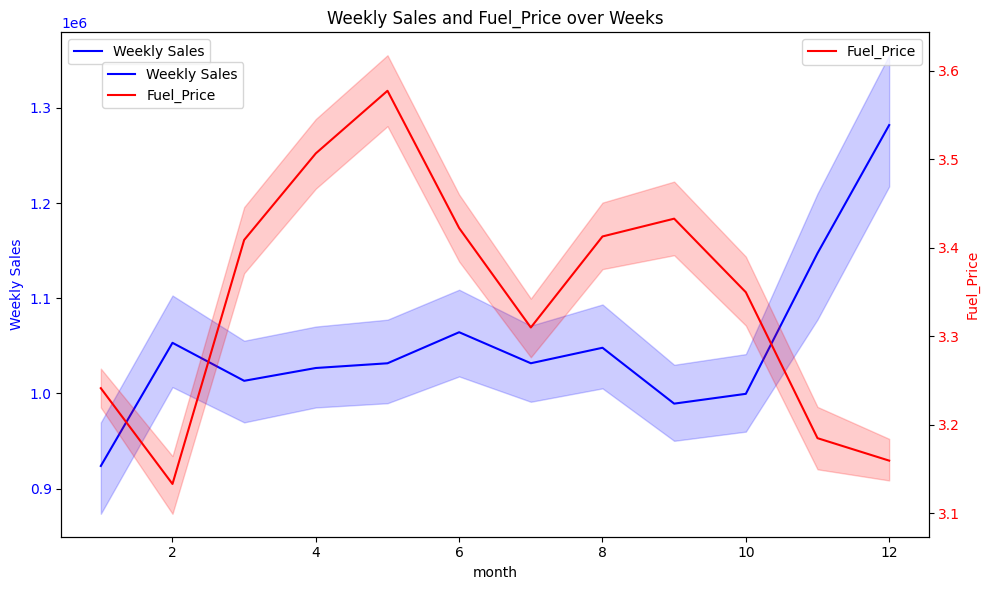

In [86]:
fig, ax1 = plt.subplots(figsize=(10, 6))


sns.lineplot(data=df, x='month', y='Weekly_Sales', ax=ax1, label='Weekly Sales', color='blue')
ax1.set_ylabel('Weekly Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis
ax2 = ax1.twinx()

# Plot Growth Percentage on the twin axis
sns.lineplot(data=df, x='month', y='Fuel_Price', ax=ax2, label='Fuel_Price', color='red')
ax2.set_ylabel('Fuel_Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
plt.title('Weekly Sales and Fuel_Price over Weeks')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

# **Fuel Price shows a very weak positive correlation with Weekly sales.**

# **Feature Engineering**

In [87]:
df['Sales_Lag_1'] = df['Weekly_Sales'].shift(1)
df['Sales_MA_4'] = df['Weekly_Sales'].rolling(window=4).mean()

In [88]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,day,month,year,week,Sales_Lag_1,Sales_MA_4
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,5,2,2010,5,NaN,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,12,2,2010,6,1643690.90,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,19,2,2010,7,1641957.44,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,26,2,2010,8,1611968.17,1576836.025
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,5,3,2010,9,1409727.59,1554614.970


# **ML**

In [89]:
df.dropna(inplace=True)

In [90]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,day,month,year,week,Sales_Lag_1,Sales_MA_4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,26,2,2010,8,1611968.17,1.576836e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,5,3,2010,9,1409727.59,1.554615e+06
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,12,3,2010,10,1554806.68,1.504011e+06
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,19,3,2010,11,1439541.59,1.469148e+06
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,26,3,2010,12,1472515.79,1.467823e+06


In [91]:
features = ['Temperature', 'Fuel_Price', 'CPI', 'Holiday_Flag', 'month','year','week','day','Sales_Lag_1', 'Sales_MA_4']
X = df[features]
y = df['Weekly_Sales']

# **Train - Test Split**

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np # Import numpy for square root

model_selection=RandomForestRegressor(n_estimators=100, random_state=42)
model_selection.fit(x_train, y_train)
y_pred=model_selection.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("R^2 Score:", r2_score(y_test, y_pred))
# Calculate RMSE by taking the square root of the Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Mean Squared Error: 7508029445.975661
R^2 Score: 0.9786670289486236
RMSE: 86648.8860053934


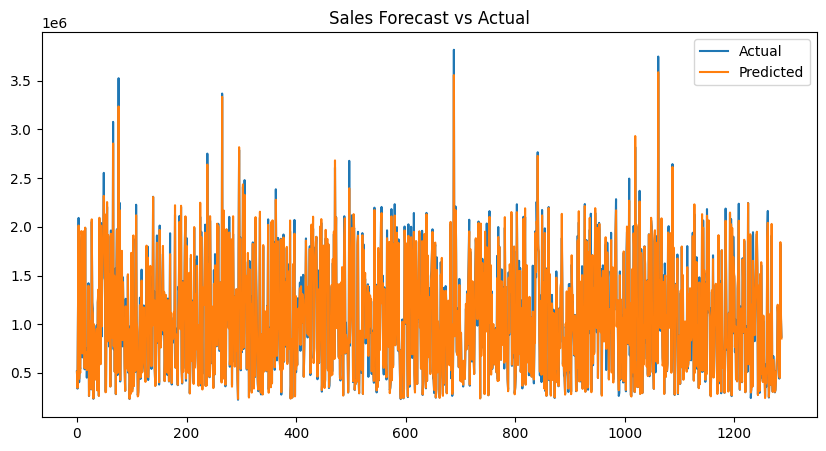

In [94]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Sales Forecast vs Actual")
plt.legend()
plt.show()

In [95]:
average_sales=df['Weekly_Sales'].mean().astype(int)

In [96]:
average_sales

np.int64(1046691)

# **If the average Weekly_Sales is close to or lower than $118,922, then the RMSE is large relative to the typical sales value, indicating that the model's predictions might be less precise.**

In [97]:

# Sort the DataFrame by Date to ensure correct lag and rolling calculations
# This is crucial for time series features
df = df.sort_values(by=['Date', 'Store']).reset_index(drop=True) #calculated within each store


lags_to_add = [2, 3, 4] # Add lags for 2, 3, and 4 weeks ago

for lag in lags_to_add:

    df[f'Sales_Lag_{lag}'] = df.groupby('Store')['Weekly_Sales'].shift(lag)

# --- Rolling Statistics ---
#calculate rolling mean and standard deviation for 'Weekly_Sales'
rolling_windows_ma = [8, 12]
rolling_windows_std = [4, 8]

for window in rolling_windows_ma:

    df[f'Sales_MA_{window}'] = df.groupby('Store')['Weekly_Sales'].rolling(window=window).mean().reset_index(level=0, drop=True)

for window in rolling_windows_std:

    df[f'Sales_Std_{window}'] = df.groupby('Store')['Weekly_Sales'].rolling(window=window).std().reset_index(level=0, drop=True)


print(df.head())


print(df.tail())

print(df[['Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3', 'Sales_Lag_4',
          'Sales_MA_4', 'Sales_MA_8', 'Sales_MA_12',
          'Sales_Std_4', 'Sales_Std_8']].isnull().sum())


features = [
    'Temperature', 'Fuel_Price', 'CPI', 'Holiday_Flag',
    'month', 'year', 'week', 'day',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3', 'Sales_Lag_4',
    'Sales_MA_4', 'Sales_MA_8', 'Sales_MA_12',
    'Sales_Std_4', 'Sales_Std_8'

]

X = df[features]
y = df['Weekly_Sales']


df_cleaned = df.dropna(subset=features + ['Weekly_Sales'])
X_cleaned = df_cleaned[features]
y_cleaned = df_cleaned['Weekly_Sales']


   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      2 2010-02-05    2136989.46             0        40.19       2.572   
1      3 2010-02-05     461622.22             0        45.71       2.572   
2      4 2010-02-05    2135143.87             0        43.76       2.598   
3      5 2010-02-05     317173.10             0        39.70       2.572   
4      6 2010-02-05    1652635.10             0        40.43       2.572   

          CPI  day  month  year  week  Sales_Lag_1    Sales_MA_4  Sales_Lag_2  \
0  210.752605    5      2  2010     5   1493659.74  1.677948e+06          NaN   
1  214.424881    5      2  2010     5   1834458.35  1.511204e+06          NaN   
2  126.442065    5      2  2010     5    405432.70  8.439735e+05          NaN   
3  211.653972    5      2  2010     5   2149594.46  1.674265e+06          NaN   
4  212.622352    5      2  2010     5    319550.77  6.527224e+05          NaN   

   Sales_Lag_3  Sales_Lag_4  Sales_MA_8  Sales_MA_12  Sa

In [98]:
print(df.dtypes)

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
day                      int32
month                    int32
year                     int32
week                    UInt32
Sales_Lag_1            float64
Sales_MA_4             float64
Sales_Lag_2            float64
Sales_Lag_3            float64
Sales_Lag_4            float64
Sales_MA_8             float64
Sales_MA_12            float64
Sales_Std_4            float64
Sales_Std_8            float64
dtype: object


# **outlier detection**

# **IQR**

In [99]:
q1=df['Weekly_Sales'].quantile(0.25)
q3=df['Weekly_Sales'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers_iqr=df[(df['Weekly_Sales']<lower_bound) | (df['Weekly_Sales']>upper_bound)]
print(outliers_iqr)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1890      4 2010-11-26    2789469.45             1        48.08       2.752   
1896     10 2010-11-26    2939946.38             1        55.33       3.162   
1899     13 2010-11-26    2766400.05             1        28.22       2.830   
1900     14 2010-11-26    2921709.71             1        46.15       3.039   
1906     20 2010-11-26    2811634.04             1        46.66       3.039   
1996     20 2010-12-10    2752122.08             0        24.27       3.109   
2025      4 2010-12-17    2740057.14             0        46.57       2.884   
2031     10 2010-12-17    2811646.85             0        59.15       3.125   
2034     13 2010-12-17    2771646.81             0        35.21       2.842   
2035     14 2010-12-17    2762861.41             0        30.51       3.140   
2041     20 2010-12-17    2819193.17             0        24.07       3.140   
2068      2 2010-12-24    3436007.68             0  

In [100]:
print(outliers_iqr.count())

Store           34
Date            34
Weekly_Sales    34
Holiday_Flag    34
Temperature     34
Fuel_Price      34
CPI             34
day             34
month           34
year            34
week            34
Sales_Lag_1     34
Sales_MA_4      34
Sales_Lag_2     34
Sales_Lag_3     34
Sales_Lag_4     34
Sales_MA_8      34
Sales_MA_12     34
Sales_Std_4     34
Sales_Std_8     34
dtype: int64


We can see that the outliers are in the december inparticular holidays season

In [101]:
df.shape

(6432, 20)

# **TO find the Distribution**

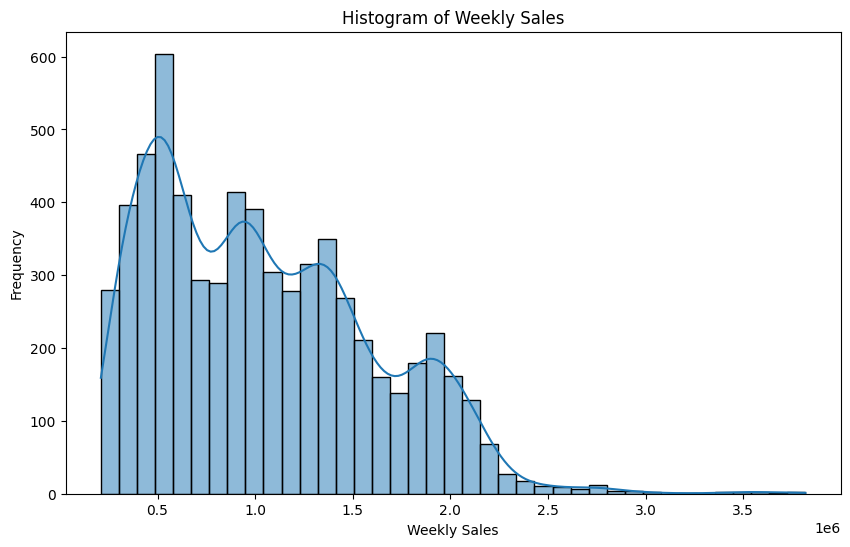

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], kde=True) # kde=True adds a kernel density estimate line
plt.title('Histogram of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# **Q-Q Plot**

<Figure size 800x600 with 0 Axes>

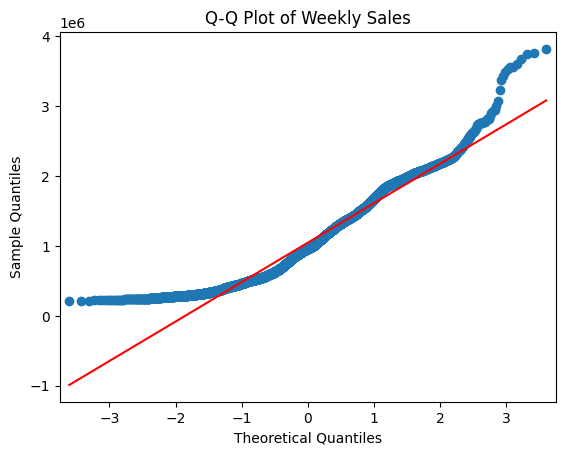

In [103]:

import statsmodels.api as sm

plt.figure(figsize=(8, 6))
sm.qqplot(df['Weekly_Sales'], line='s') # line='s' plots a standard normal line
plt.title('Q-Q Plot of Weekly Sales')
plt.show()

If the data is normally distributed, the points on the Q-Q plot should fall roughly along a straight diagonal line. Deviations from this line indicate non-normality. Points curving away from the line suggest skewness or heavier/lighter tails than a normal distribution.

# **Shapiro-Wilk Test**

P-value > 0.05: You fail to reject the null hypothesis. There is not enough evidence to say the data is not normal.

P-value <= 0.05: You reject the null hypothesis. There is significant evidence that the data is not normally distributed.

In [104]:
import pandas as pd
from scipy.stats import shapiro # Import the shapiro test

# Assuming 'df' DataFrame is loaded and you want to check 'Weekly_Sales'

stat, p_value = shapiro(df['Weekly_Sales'])

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.9470
P-value: 0.0000
The data does not appear to be normally distributed (reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6432.
  res = hypotest_fun_out(*samples, **kwds)


# **D'Agostino's K² Test**

In [105]:
import pandas as pd
from scipy.stats import normaltest # D'Agostino's K^2 test

# Assuming 'df' DataFrame is loaded and you want to check 'Weekly_Sales'

stat, p_value = normaltest(df['Weekly_Sales'])

print(f"D'Agostino's K^2 Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

D'Agostino's K^2 Test Statistic: 402.0240
P-value: 0.0000
The data does not appear to be normally distributed (reject H0)


Refine Holiday/Seasonal Features: Instead of (or in addition to) using Is_Christmas_Week, create more specific features targeting these precise dates or the period leading up to Christmas:

In [106]:

    # --- Create a flag for the core Christmas outlier dates ---
    christmas_outlier_days = [16, 17, 23, 24, 25, 26] # Based on finding
    df['Is_Core_Christmas_Outlier_Period'] = ((df['Date'].dt.month == 12) &
                                                df['Date'].dt.day.isin(christmas_outlier_days)).astype(int)

    # This is a bit trickier as you need the Dec 25th date for each year
    # Let's create a helper column for Dec 25th of the relevant year
    df['Christmas_Date'] = pd.to_datetime(df['Date'].dt.year.astype(str) + '-12-25')

    df['Days_from_Christmas'] = (df['Date'] - df['Christmas_Date']).dt.days

    # Example: Days_Until_Christmas (only positive before Dec 25)
    df['Days_Until_Christmas'] = df['Days_from_Christmas'].apply(lambda x: -x if x <= 0 else 0)
    # Example: Days_After_Christmas (only positive after Dec 25)
    df['Days_After_Christmas'] = df['Days_from_Christmas'].apply(lambda x: x if x > 0 else 0)

    # Drop the helper column
    df = df.drop(columns=['Christmas_Date', 'Days_from_Christmas'])


    print(df[['Date', 'Weekly_Sales', 'Is_Core_Christmas_Outlier_Period',
              'Days_Until_Christmas', 'Days_After_Christmas']].head(30)) # Look at December dates

         Date  Weekly_Sales  Is_Core_Christmas_Outlier_Period  \
0  2010-02-05    2136989.46                                 0   
1  2010-02-05     461622.22                                 0   
2  2010-02-05    2135143.87                                 0   
3  2010-02-05     317173.10                                 0   
4  2010-02-05    1652635.10                                 0   
5  2010-02-05     496725.44                                 0   
6  2010-02-05    1004137.09                                 0   
7  2010-02-05     549505.55                                 0   
8  2010-02-05    2193048.75                                 0   
9  2010-02-05    1528008.64                                 0   
10 2010-02-05    1100046.37                                 0   
11 2010-02-05    1967220.53                                 0   
12 2010-02-05    2623469.95                                 0   
13 2010-02-05     652122.44                                 0   
14 2010-02-05     477409.

# **Applying a Log Transformation**

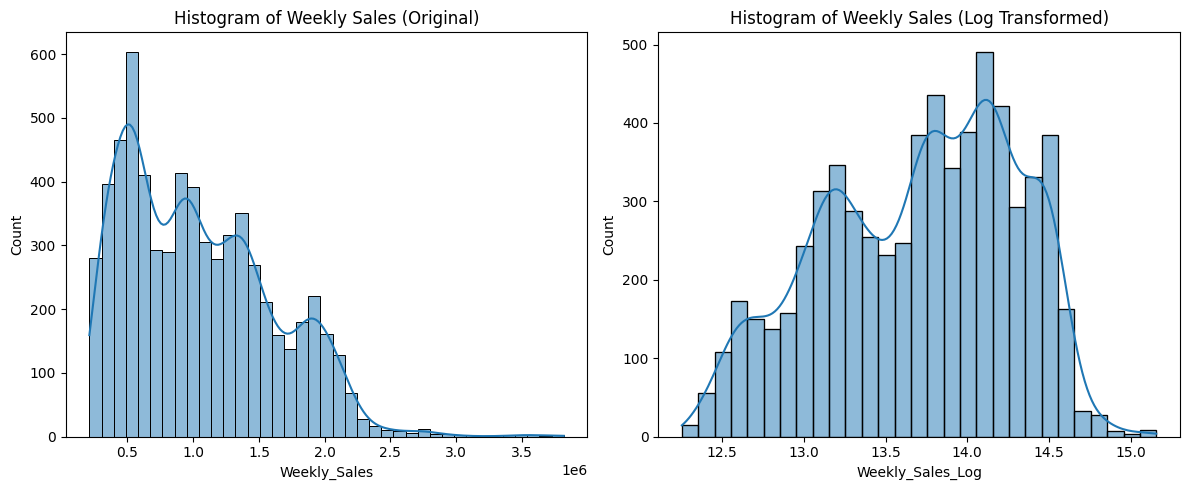

In [107]:
# Before Transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Histogram of Weekly Sales (Original)')

# Apply Log Transformation (add 1 to handle potential zeros or small values)

df['Weekly_Sales_Log'] = np.log1p(df['Weekly_Sales']) # log1p(x) is log(x+1)

# After Transformation
plt.subplot(1, 2, 2)
sns.histplot(df['Weekly_Sales_Log'], kde=True)
plt.title('Histogram of Weekly Sales (Log Transformed)')
plt.tight_layout()
plt.show()

# You can also check the Q-Q plot and statistical tests again on the transformed data
# from scipy.stats import shapiro
# stat, p_value = shapiro(df['Weekly_Sales_Log'])
# print(f"Shapiro-Wilk Test on Log-Transformed Data P-value: {p_value:.4f}")

# **Finding Seasonality in Data**

dentifying patterns that repeat at regular intervals, such as daily, weekly, monthly, quarterly, or yearly.

<Axes: xlabel='week', ylabel='Weekly_Sales'>

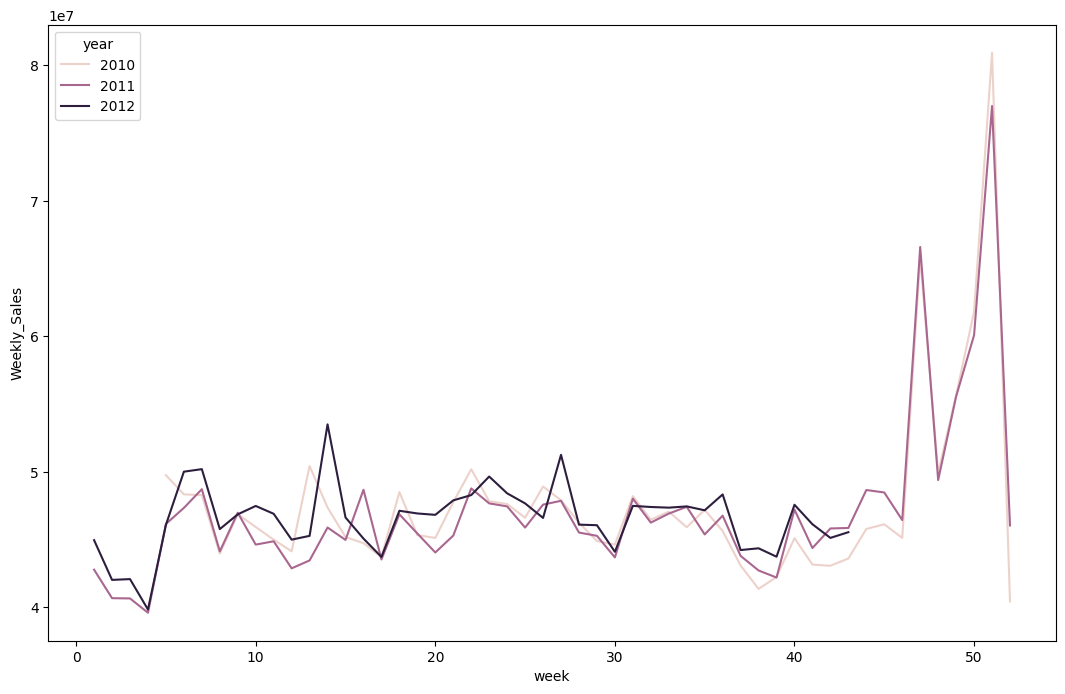

In [108]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,8))
sns.lineplot(data=weekly_sales_by_year_week, x='week', y='Weekly_Sales',hue='year')

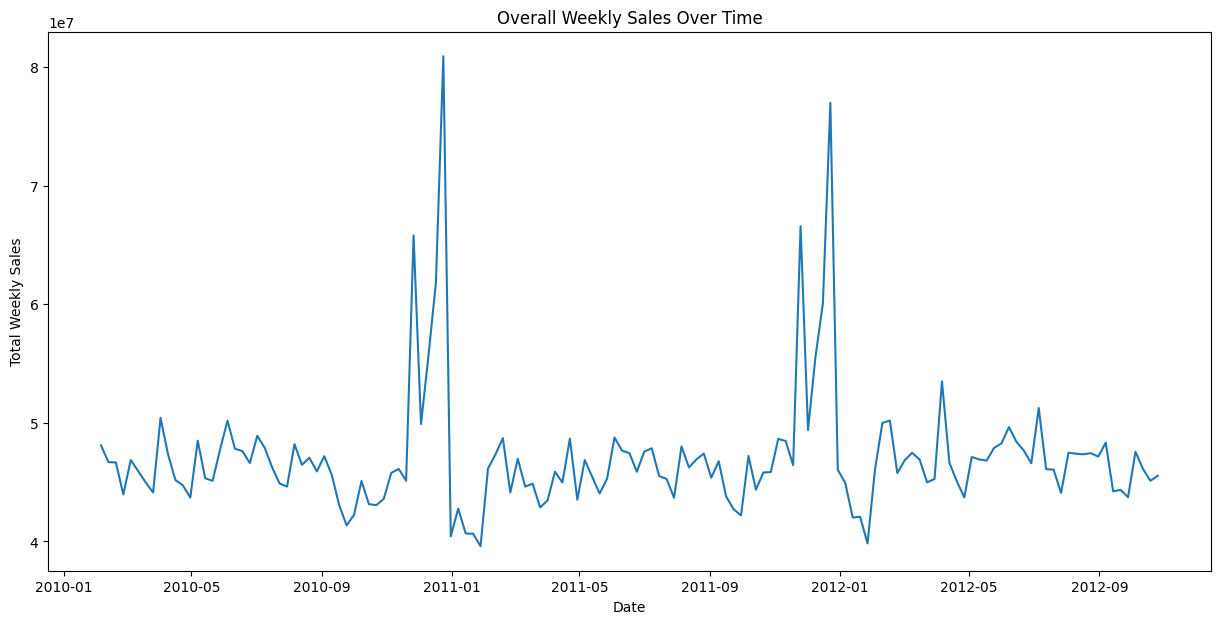

In [109]:
weekly_sales_overall = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=weekly_sales_overall, x='Date', y='Weekly_Sales')
plt.title('Overall Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

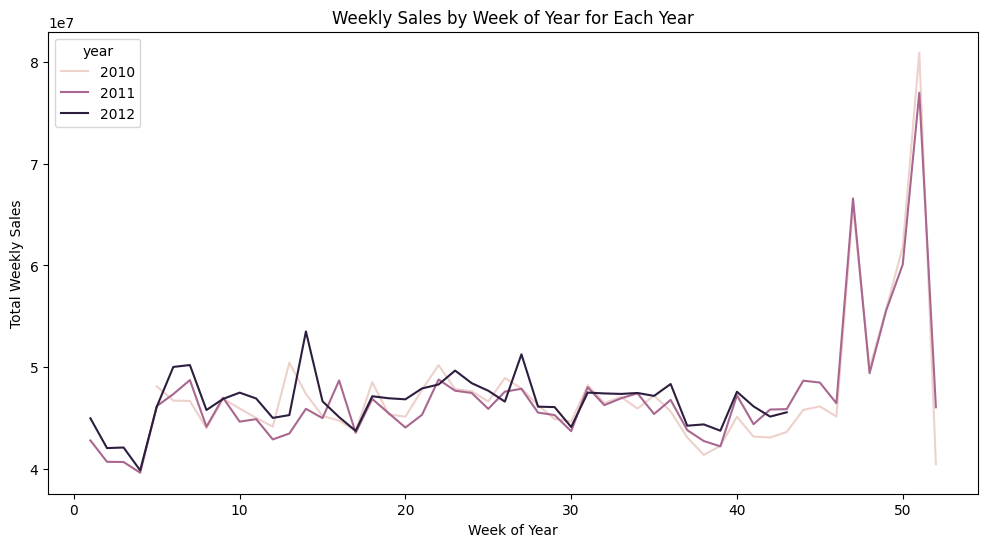

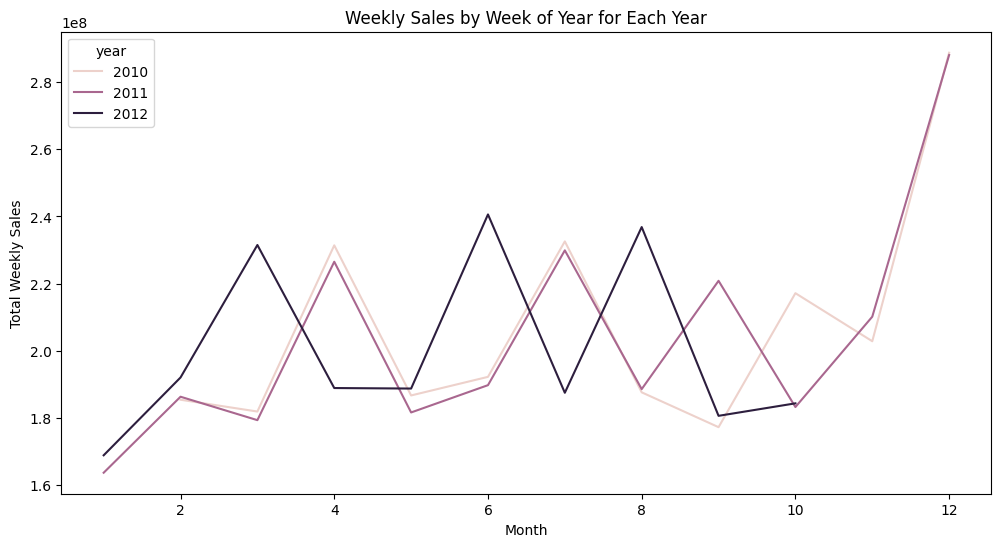

In [110]:
weekly_sales_by_year_week = df.groupby(['year', 'week'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
# Plot sales for each year against the week of the year
sns.lineplot(data=weekly_sales_by_year_week, x='week', y='Weekly_Sales', hue='year')
plt.title('Weekly Sales by Week of Year for Each Year')
plt.xlabel('Week of Year')
plt.ylabel('Total Weekly Sales')
plt.show()



weekly_sales_by_year_week = df.groupby(['year', 'month'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
# Plot sales for each year against the week of the year
sns.lineplot(data=weekly_sales_by_year_week, x='month', y='Weekly_Sales', hue='year')
plt.title('Weekly Sales by Week of Year for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.show()


In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [112]:

df = df.sort_values(by='Date').reset_index(drop=True)

# Aggregate weekly sales by Date to get a single time series
weekly_sales_overall = df.groupby('Date')['Weekly_Sales'].sum()

# Set the Date as the index for time series analysis
weekly_sales_overall.index = pd.to_datetime(weekly_sales_overall.index)


In [113]:
weekly_sales_overall.head()

,Weekly_Sales
Date,
2010-02-05,48107049.60
2010-02-12,46694720.19
2010-02-19,46665025.61
2010-02-26,43968571.13
2010-03-05,46871470.30


# **Seasonal Decomposition**

<Figure size 1200x800 with 0 Axes>

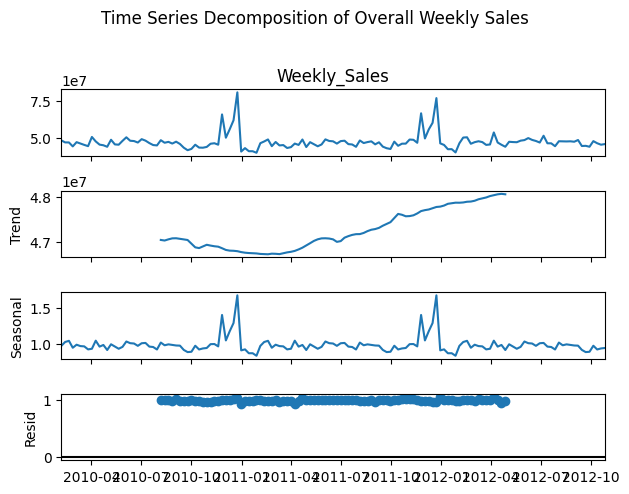

<Figure size 1200x600 with 0 Axes>

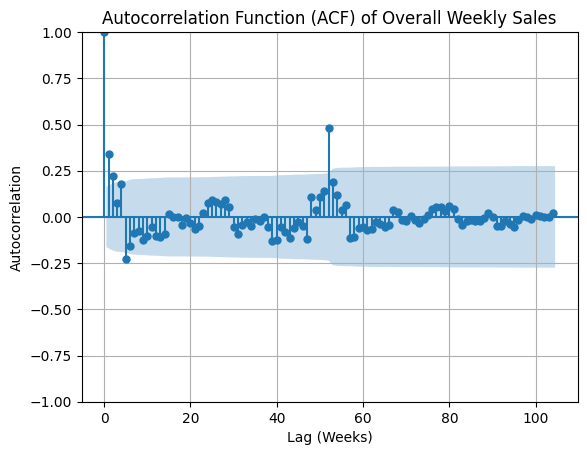

In [114]:
# --- Perform Seasonal Decomposition ---
# Choose between additive or multiplicative decomposition.
# Additive: Time Series = Trend + Seasonality + Residuals (when seasonal variation is constant)
# Multiplicative: Time Series = Trend * Seasonality * Residuals (when seasonal variation changes with the trend)
# For sales data, which often sees larger seasonal swings with higher sales, multiplicative is often more appropriate.
# You need to specify the period of seasonality. For weekly data with yearly seasonality, the period is usually 52.

decomposition = seasonal_decompose(weekly_sales_overall, model='multiplicative', period=52)


plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Overall Weekly Sales', y=1.02)
plt.tight_layout()
plt.show()

# --- Calculate and Plot ACF ---
# The ACF plot shows the correlation of a time series with its lagged values.
# Peaks at certain lags indicate potential seasonality or autocorrelation.

plt.figure(figsize=(12, 6))
plot_acf(weekly_sales_overall, lags=104) # lags=104 will show correlations up to 2 years (2 * 52 weeks)
plt.title('Autocorrelation Function (ACF) of Overall Weekly Sales')
plt.xlabel('Lag (Weeks)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# **SARIMA**

In [115]:

from sklearn.metrics import mean_squared_error
import warnings
import itertools


warnings.filterwarnings("ignore")

df = df.sort_values(by='Date').reset_index(drop=True)


weekly_sales_overall = df.groupby('Date')['Weekly_Sales'].sum()


weekly_sales_overall.index = pd.to_datetime(weekly_sales_overall.index)

train_size = int(len(weekly_sales_overall) * 0.8) # 80% for training, 20% for testing
train_data, test_data = weekly_sales_overall[0:train_size], weekly_sales_overall[train_size:len(weekly_sales_overall)]

print(f"Training data length: {len(train_data)}")
print(f"Testing data length: {len(test_data)}")

# --- Grid Search for Optimal SARIMA Parameters ---
# Define the range of parameters to explore
p = d = q = range(0, 2) # Non-seasonal orders: 0 or 1
P = D = Q = range(0, 2) # Seasonal orders: 0 or 1
s = 52                  # Seasonal period (52 weeks for yearly)

# Create a list of all possible parameter combinations
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [s]))

best_aic = float("inf")
best_order = None
best_seasonal_order = None

print('Searching for optimal SARIMA parameters...')

# This grid search can take a significant amount of time depending on the range of parameters and data size.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train_data,
                                              order=param,
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            results = model.fit(disp=False) # disp=False suppresses fitting output

            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal

        except:
            continue

print(f'\nBest SARIMA Model:')
print(f'Order: {best_order}')
print(f'Seasonal Order: {best_seasonal_order}')
print(f'AIC: {best_aic:.2f}')

# --- Train the SARIMA Model with the Best Parameters ---
print('\nTraining SARIMA model with best parameters...')
sarima_model = sm.tsa.statespace.SARIMAX(train_data,
                                         order=best_order,
                                         seasonal_order=best_seasonal_order,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

sarima_results = sarima_model.fit(disp=False)
print(sarima_results.summary())

# --- Make Predictions ---
# You can make predictions for the test set or for future periods
start_index = len(train_data)
end_index = len(weekly_sales_overall) - 1
predictions = sarima_results.predict(start=start_index, end=end_index)

# --- Evaluate the Model ---
rmse = mean_squared_error(test_data, predictions, squared=False) # squared=False gives RMSE
print(f'\nRMSE on Test Data: {rmse:.2f}')

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(predictions.index, predictions, label='SARIMA Predictions', color='red')
plt.title('Weekly Sales Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


Training data length: 114
Testing data length: 29
Searching for optimal SARIMA parameters...

Best SARIMA Model:
Order: (0, 1, 1)
Seasonal Order: (0, 1, 1, 52)
AIC: 230.30

Training SARIMA model with best parameters...
                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -112.151
Date:                            Mon, 02 Jun 2025   AIC                            230.302
Time:                                    12:50:05   BIC                            230.140
Sample:                                02-05-2010   HQIC                           228.297
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z

TypeError: got an unexpected keyword argument 'squared'


Future Forecast (next 52 weeks):
2012-04-13    5.306632e+07
2012-04-20    5.823313e+07
2012-04-27    5.180584e+07
2012-05-04    5.408499e+07
2012-05-11    5.363317e+07
2012-05-18    5.185353e+07
2012-05-25    5.232298e+07
2012-06-01    5.587669e+07
2012-06-08    5.547555e+07
2012-06-15    5.527100e+07
2012-06-22    5.363747e+07
2012-06-29    5.485645e+07
2012-07-06    5.569626e+07
2012-07-13    5.331047e+07
2012-07-20    5.360403e+07
2012-07-27    5.158976e+07
2012-08-03    5.576643e+07
2012-08-10    5.419305e+07
2012-08-17    5.481611e+07
2012-08-24    5.600987e+07
2012-08-31    5.269095e+07
2012-09-07    5.525935e+07
2012-09-14    5.244388e+07
2012-09-21    5.178671e+07
2012-09-28    5.068549e+07
2012-10-05    5.610229e+07
2012-10-12    5.319087e+07
2012-10-19    5.516360e+07
2012-10-26    5.496880e+07
2012-11-02    5.772768e+07
2012-11-09    5.732859e+07
2012-11-16    5.505663e+07
2012-11-23    7.263618e+07
2012-11-30    5.683282e+07
2012-12-07    6.247847e+07
2012-12-14    6.57380

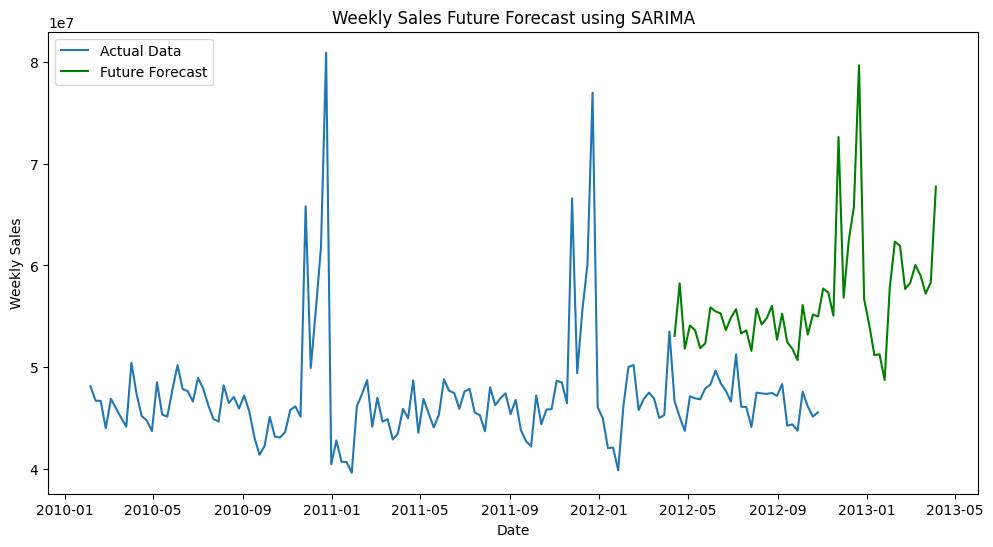

In [116]:

# --- Make Future Forecasts (Optional) ---
# You can extend the predictions beyond the test set if you want to forecast into the future.
forecast_steps = 52 # Forecast for the next 52 weeks (1 year)
future_forecast = sarima_results.forecast(steps=forecast_steps)

print("\nFuture Forecast (next 52 weeks):")
print(future_forecast)

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales_overall.index, weekly_sales_overall, label='Actual Data')
plt.plot(future_forecast.index, future_forecast, label='Future Forecast', color='green')
plt.title('Weekly Sales Future Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [117]:
# Assuming y_test and y_pred are your actual and predicted values for the test set
# And df_cleaned is the DataFrame used for splitting

# Get the dates from the cleaned test set (requires matching indices)
test_dates = df_cleaned.loc[y_test.index, 'Date']

# Filter for December dates within the test set
december_test_indices = test_dates[test_dates.dt.month == 12].index

# Get actual and predicted values for December
y_test_dec = y_test.loc[december_test_indices]
y_pred_dec = pd.Series(y_pred, index=y_test.index).loc[december_test_indices] # Ensure predictions align with test index

# If you transformed y, remember to inverse transform y_test_dec and y_pred_dec first!
# y_test_dec_original = np.expm1(y_test_dec)
# y_pred_dec_original = np.expm1(y_pred_dec)
# Then calculate errors or plot using the original scale values

print("\nActual vs Predicted Sales for December dates in Test Set:")
dec_results = pd.DataFrame({'Actual': y_test_dec, 'Predicted': y_pred_dec, 'Date': test_dates.loc[december_test_indices]})
dec_results['Error'] = dec_results['Actual'] - dec_results['Predicted']
print(dec_results)

KeyError: '[250, 201, 242, 34, 159, 233, 537, 236, 83, 266, 26, 475, 396, 99, 135, 349, 211, 354, 468, 220, 299, 91, 384, 472, 327, 40, 489, 160, 471, 82, 170, 53, 311, 96, 94, 321, 20, 479, 17, 268, 199, 435, 87, 381, 188, 231, 428, 251, 404, 257, 224, 68, 379, 180, 171, 322, 336, 440, 262, 48, 326, 234, 450, 413, 44, 22, 202, 54, 104, 6433, 411, 328, 293, 374, 125, 442, 282, 324, 248, 423, 376, 184, 18, 318, 11, 429, 36, 47, 66, 438, 230, 182, 476, 300, 306, 243, 260, 127, 78, 152, 456, 352, 175, 425, 105, 138, 357, 147, 383, 124, 421, 417, 113, 110, 32, 93, 72, 296, 448, 370, 154] not in index'

Z-score

In [ ]:
# --- Method 2: Using Z-score (less common for data with non-normal distribution or extreme values) ---
# Z-score measures how many standard deviations a data point is from the mean.
# A common threshold for identifying outliers using Z-score is typically above 2, 3, or 3.5.
# This method is more sensitive to extreme values and assumes the data is normally distributed.

# from scipy import stats # You might need to install scipy if you don't have it (!pip install scipy)

# Calculate the mean and standard deviation
# mean = df['Weekly_Sales'].mean()
# std_dev = df['Weekly_Sales'].std()

# Calculate the Z-score for each data point
# df['Sales_ZScore'] = np.abs((df['Weekly_Sales'] - mean) / std_dev) # Using absolute value to find outliers on both ends

# Define a Z-score threshold
# z_score_threshold = 3 # Common threshold, adjust as needed

# Find outliers based on Z-score
# outliers_zscore = df[df['Sales_ZScore'] > z_score_threshold]

# Print the outliers found using the Z-score method
# print("\nOutliers in 'Weekly_Sales' using Z-score method:")
# print(outliers_zscore)
# print(f"Using a Z-score threshold of {z_score_threshold}")

# You can choose which method is more appropriate for your data.
# IQR is generally preferred for skewed data or when you don't want extreme values to heavily influence the outlier detection.